In [1]:
### ValDXer testing
import os
from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.coordinates.XTC import XTCWriter

from pdbfixer import PDBFixer
from openmm.app import PDBFile

settings = Settings(name='test_full0.5')
settings.replicates = 1
settings.gamma_range = (2,6)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.split_mode = 'R3'
settings.stride = 1000
# settings.HDXer_stride = 10000

settings.RW_do_reweighting = False
settings.RW_do_params = True
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "HOIPapo_test"


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX


/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.50
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.51
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.52
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.53
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.54
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.55
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.56
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.57
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.58
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.59
Experiment name test_full0.5 already exists. Atte

In [2]:
### add code to read in sequence from CIF file instead of copying it manually

cif_file = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HOIP/HOIP_apo/AF-Q96EP0-F1-model_v4.cif"

sequence_header = "_entity_poly.pdbx_seq_one_letter_code"
sequence = ""
seq_head_idx = 0
with open(cif_file, 'r') as f:
    lines = f.readlines()
    for idx, line in enumerate(lines):
        if sequence_header in line:
            seq_head_idx = idx+1
            break
    
    for idx, line in enumerate(lines[seq_head_idx:]):
        if idx > 0 and line[0] == ";":
            break
        sequence += line.strip()


# print(sequence)



# strip sequence of non letters
sequence = ''.join([i for i in sequence if i.isalpha()])

print(sequence)

print("Sequence length: ", len(sequence))


# convert sequence to FASTA format
def write_fasta(sequence, header, file_name):
    """
    Writes a single-letter amino acid sequence to a FASTA file.
    
    Parameters:
    - sequence: A string containing the amino acid sequence.
    - header: A string to be used as the header in the FASTA file.
    - file_name: The name of the FASTA file to be created.
    """
    print(f"Writing sequence to {file_name}")
    with open(file_name, 'w') as fasta_file:
        # Write the header with the '>' symbol
        fasta_file.write(f">{header}\n")
        
        # Write the sequence in lines of 80 characters
        for i in range(0, len(sequence), 80):
            fasta_file.write(sequence[i:i+80] + "\n")


MPGEEEERAFLVAREELASALRRDSGQAFSLEQLRPLLASSLPLAARYLQLDAARLVRCNAHGEPRNYLNTLSTALNILEKYGRNLLSPQRPRYWRGVKFNNPVFRSTVDAVQGGRDVLRLYGYTEEQPDGLSFPEGQEEPDEHQVATVTLEVLLLRTELSLLLQNTHPRQQALEQLLEDKVEDDMLQLSEFDPLLREIAPGPLTTPSVPGSTPGPCFLCGSAPGTLHCPSCKQALCPACDHLFHGHPSRAHHLRQTLPGVLQGTHLSPSLPASAQPRPQSTSLLALGDSSLSSPNPASAHLPWHCAACAMLNEPWAVLCVACDRPRGCKGLGLGTEGPQGTGGLEPDLARGRWACQSCTFENEAAAVLCSICERPRLAQPPSLVVDSRDAGICLQPLQQGDALLASAQSQVWYCIHCTFCNSSPGWVCVMCNRTSSPIPAQHAPRPYASSLEKGPPKPGPPRRLSAPLPSSCGDPEKQRQDKMREEGLQLVSMIREGEAAGACPEEIFSALQYSGTEVPLQWLRSELPYVLEMVAELAGQQDPGLGAFSCQEARRAWLDRHGNLDEAVEECVRTRRRKVQELQSLGFGPEEGSLQALFQHGGDVSRALTELQRQRLEPFRQRLWDSGPEPTPSWDGPDKQSLVRRLLAVYALPSWGRAELALSLLQETPRNYELGDVVEAVRHSQDRAFLRRLLAQECAVCGWALPHNRMQALTSCECTICPDCFRQHFTIALKEKHITDMVCPACGRPDLTDDTQLLSYFSTLDIQLRESLEPDAYALFHKKLTEGVLMRDPKFLWCAQCSFGFIYEREQLEATCPQCHQTFCVRCKRQWEEQHRGRSCEDFQNWKRMNDPEYQAQGLAMYLQENGIDCPKCKFSYALARGGCMHFHCTQCRHQFCSGCYNAFYAKNKCPEPNCRVKKSLHGHHPRDCLFYLRDWTALRLQKLLQDNNVMFNTEPPAGARAVPGGGCRVIEQKEVPNGLRDEACGKETPAGYAGLCQA

In [3]:

fasta_path = os.path.join("raw_data", "HOIP", 'HOIP_apo.fasta')
write_fasta(sequence, 'HOIPapo', fasta_path)



Writing sequence to raw_data/HOIP/HOIP_apo.fasta


In [4]:
raw_hdx_path = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HOIP/HOIP_apo/HOIP_apo_peptide.csv"
raw_hdx = pd.read_csv(raw_hdx_path)
raw_hdx.tail()

Unnamed: 0                Sequence  MaxUptake    Uptake  Start  End  \
322        3536  RYLHVRPQPLAGEDPPAYQARL         17  4.065133    339  360   
323        3537  RYLHVRPQPLAGEDPPAYQARL         17  4.601580    339  360   
324        3568     LQKLTEEVPLGQSIPRRRK         16  0.000000    361  379   
325        3569     LQKLTEEVPLGQSIPRRRK         16  4.921218    361  379   
326        3570     LQKLTEEVPLGQSIPRRRK         16  5.863643    361  379   

           RT     RT.SD  
322  5.980509  0.004256  
323  5.977207  0.004590  
324  5.086766  0.002262  
325  5.077346  0.001499  
326  5.071376  0.005158

In [5]:
# drop Unnamed: 0	

raw_hdx = raw_hdx.drop(columns=['Unnamed: 0'])
raw_hdx.head()


Sequence  MaxUptake    Uptake  Start  End        RT     RT.SD
0        GPGQECA          5  0.000000      1    7  3.019829  0.005348
1        GPGQECA          5  2.093943      1    7  3.014965  0.007647
2        GPGQECA          5  2.221890      1    7  3.013609  0.001502
3  CAVCGWALPHNRM         11  0.000000      6   18  7.366025  0.000841
4  CAVCGWALPHNRM         11  4.080613      6   18  7.359962  0.004124

In [6]:
# assign peptide number for each start and end residue using ngroup
raw_hdx['peptide'] = raw_hdx.groupby(['Start','End']).ngroup()

raw_hdx.head()

Sequence  MaxUptake    Uptake  Start  End        RT     RT.SD  peptide
0        GPGQECA          5  0.000000      1    7  3.019829  0.005348        0
1        GPGQECA          5  2.093943      1    7  3.014965  0.007647        0
2        GPGQECA          5  2.221890      1    7  3.013609  0.001502        0
3  CAVCGWALPHNRM         11  0.000000      6   18  7.366025  0.000841        1
4  CAVCGWALPHNRM         11  4.080613      6   18  7.359962  0.004124        1

In [7]:

times = [0, 0.5, 5.0]

num_peptides = len(raw_hdx)//len(times)

exposure = times * num_peptides

raw_hdx['Exposure'] = exposure

raw_hdx.head()

Sequence  MaxUptake    Uptake  Start  End        RT     RT.SD  \
0        GPGQECA          5  0.000000      1    7  3.019829  0.005348   
1        GPGQECA          5  2.093943      1    7  3.014965  0.007647   
2        GPGQECA          5  2.221890      1    7  3.013609  0.001502   
3  CAVCGWALPHNRM         11  0.000000      6   18  7.366025  0.000841   
4  CAVCGWALPHNRM         11  4.080613      6   18  7.359962  0.004124   

   peptide  Exposure  
0        0       0.0  
1        0       0.5  
2        0       5.0  
3        1       0.0  
4        1       0.5

In [8]:
raw_hdx['UptakeFraction'] = raw_hdx['Uptake'] / raw_hdx['MaxUptake']

raw_hdx.head()

Sequence  MaxUptake    Uptake  Start  End        RT     RT.SD  \
0        GPGQECA          5  0.000000      1    7  3.019829  0.005348   
1        GPGQECA          5  2.093943      1    7  3.014965  0.007647   
2        GPGQECA          5  2.221890      1    7  3.013609  0.001502   
3  CAVCGWALPHNRM         11  0.000000      6   18  7.366025  0.000841   
4  CAVCGWALPHNRM         11  4.080613      6   18  7.359962  0.004124   

   peptide  Exposure  UptakeFraction  
0        0       0.0        0.000000  
1        0       0.5        0.418789  
2        0       5.0        0.444378  
3        1       0.0        0.000000  
4        1       0.5        0.370965

In [9]:
# clamp UptakeFraction to 1
raw_hdx['UptakeFraction'] = raw_hdx['UptakeFraction'].clip(upper=1)

In [10]:
# print entire dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(raw_hdx)



                      Sequence  MaxUptake     Uptake  Start  End        RT  \
0                      GPGQECA          5   0.000000      1    7  3.019829   
1                      GPGQECA          5   2.093943      1    7  3.014965   
2                      GPGQECA          5   2.221890      1    7  3.013609   
3                CAVCGWALPHNRM         11   0.000000      6   18  7.366025   
4                CAVCGWALPHNRM         11   4.080613      6   18  7.359962   
5                CAVCGWALPHNRM         11   4.972398      6   18  7.354624   
6             CAVCGWALPHNRMQAL         14   0.000000      6   21  7.871807   
7             CAVCGWALPHNRMQAL         14   5.605602      6   21  7.862794   
8             CAVCGWALPHNRMQAL         14   6.796135      6   21  7.858893   
9         CAVCGWALPHNRMQALTSCE         18   0.000000      6   25  7.780676   
10        CAVCGWALPHNRMQALTSCE         18   8.257495      6   25  7.758044   
11        CAVCGWALPHNRMQALTSCE         18   9.270519      6   25

In [11]:

# pivot exposure and uptake fraction
grouped = raw_hdx.pivot(index=['Start', 'End'], columns='Exposure', values='UptakeFraction').reset_index()

# drop 
grouped.head()


Exposure  Start  End  0.0       0.5       5.0
0             1    7  0.0  0.418789  0.444378
1             6   18  0.0  0.370965  0.452036
2             6   21  0.0  0.400400  0.485438
3             6   25  0.0  0.458750  0.515029
4             7   18  0.0  0.417256  0.495187

In [12]:

# print entire dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(grouped)

Exposure  Start  End  0.0       0.5       5.0
0             1    7  0.0  0.418789  0.444378
1             6   18  0.0  0.370965  0.452036
2             6   21  0.0  0.400400  0.485438
3             6   25  0.0  0.458750  0.515029
4             7   18  0.0  0.417256  0.495187
5             7   21  0.0  0.441761  0.509265
6             7   25  0.0  0.489870  0.540901
7             8   18  0.0  0.413157  0.482536
8             8   20  0.0  0.466166  0.510658
9             8   21  0.0  0.468247  0.520281
10            8   24  0.0  0.482729  0.531020
11            8   25  0.0  0.502576  0.539876
12           11   18  0.0  0.473734  0.501436
13           11   20  0.0  0.520572  0.541015
14           11   21  0.0  0.528228  0.556396
15           11   23  0.0  0.558020  0.575043
16           11   25  0.0  0.556407  0.571956
17           19   25  0.0  0.529281  0.548268
18           26   32  0.0  0.171628  0.278834
19           26   33  0.0  0.168832  0.286864
20           27   33  0.0  0.16340

In [13]:
# conver to HDXer format ie start, end, exposure_1, exposure_2 

# change Start to ResStr and End to ResEnd
hdx = grouped.rename(columns={'Start': 'ResStr', 'End': 'ResEnd'})

# drop the exposure column
hdx.columns.name = None

print(hdx)


     ResStr  ResEnd  0.0       0.5       5.0
0         1       7  0.0  0.418789  0.444378
1         6      18  0.0  0.370965  0.452036
2         6      21  0.0  0.400400  0.485438
3         6      25  0.0  0.458750  0.515029
4         7      18  0.0  0.417256  0.495187
5         7      21  0.0  0.441761  0.509265
6         7      25  0.0  0.489870  0.540901
7         8      18  0.0  0.413157  0.482536
8         8      20  0.0  0.466166  0.510658
9         8      21  0.0  0.468247  0.520281
10        8      24  0.0  0.482729  0.531020
11        8      25  0.0  0.502576  0.539876
12       11      18  0.0  0.473734  0.501436
13       11      20  0.0  0.520572  0.541015
14       11      21  0.0  0.528228  0.556396
15       11      23  0.0  0.558020  0.575043
16       11      25  0.0  0.556407  0.571956
17       19      25  0.0  0.529281  0.548268
18       26      32  0.0  0.171628  0.278834
19       26      33  0.0  0.168832  0.286864
20       27      33  0.0  0.163408  0.273532
21       3

In [14]:

hdx = hdx.round(5)
hdx.to_csv(os.path.join("raw_data", "HOIP", 'HOIP_apo.dat'), sep=' ', index=False)


In [15]:
segs = hdx[['ResStr', 'ResEnd']].drop_duplicates().sort_values(by=['ResStr', 'ResEnd']).reset_index(drop=True)


In [16]:

# convert to list of tuples
segs = [tuple(x) for x in segs.values]

print(segs)


[(1, 7), (6, 18), (6, 21), (6, 25), (7, 18), (7, 21), (7, 25), (8, 18), (8, 20), (8, 21), (8, 24), (8, 25), (11, 18), (11, 20), (11, 21), (11, 23), (11, 25), (19, 25), (26, 32), (26, 33), (27, 33), (33, 40), (34, 40), (34, 41), (41, 48), (41, 49), (41, 51), (42, 49), (42, 51), (42, 65), (49, 61), (49, 65), (50, 65), (52, 61), (52, 65), (74, 84), (76, 84), (77, 84), (77, 85), (77, 87), (77, 88), (77, 97), (85, 97), (86, 97), (88, 97), (89, 97), (98, 104), (98, 106), (98, 108), (113, 120), (114, 120), (117, 131), (121, 131), (121, 132), (132, 149), (132, 150), (132, 153), (150, 169), (151, 162), (151, 167), (151, 169), (151, 170), (154, 169), (155, 169), (169, 183), (170, 183), (170, 185), (170, 186), (171, 183), (171, 186), (184, 195), (184, 208), (187, 195), (187, 208), (187, 209), (188, 208), (194, 208), (196, 208), (213, 223), (224, 238), (224, 239), (247, 257), (247, 259), (247, 260), (248, 259), (248, 260), (250, 257), (250, 260), (253, 260), (261, 275), (261, 276), (261, 278), (26

In [17]:


# write list as new lines with space delimiter
with open(os.path.join("raw_data", "HOIP", 'HOIP_APO_segs.txt'), 'w') as f:
    for item in segs:
        f.write("%s\n" % ' '.join(map(str, item)))

In [18]:
### at the moment PDB fixer is adding different number of hydrogens to different structures... Need to change the code to use PROPKA to get H states and apply to all strucutres
BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HOIP/HOIP_apo/"
sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

print(pdb_list) 


H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

os.makedirs(H_sim_dir, exist_ok=True)

for pdb in pdb_list:
    continue
    fixer = PDBFixer(os.path.join(sim_dir, pdb))
    fixer.addMissingHydrogens(7.0)
    H_pdb_name = pdb.replace('.pdb', '_H.pdb')
    PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)

pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]



top_path = os.path.join(H_sim_dir, pdb_list[0])
pdb_paths = [os.path.join(H_sim_dir, i) for i in pdb_list]

print(top_path)
print(pdb_paths)


small_traj_name = top_path.replace(".pdb","_small.xtc")
small_traj_path = os.path.join(H_sim_dir, small_traj_name)

u = mda.Universe(top_path)
    
with XTCWriter(small_traj_path, n_atoms=u.atoms.n_atoms) as W:
    for ts in u.trajectory:
        W.write(u.atoms)
        W.write(u.atoms)
        break


['HOIPapo_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000.pdb', 'HOIPapo_unrelaxed_rank_001_alphafold2_ptm_model_1_seed_000.pdb', 'HOIPapo_unrelaxed_rank_003_alphafold2_ptm_model_4_seed_000.pdb', 'HOIPapo_unrelaxed_rank_004_alphafold2_ptm_model_5_seed_000.pdb', 'HOIPapo_unrelaxed_rank_002_alphafold2_ptm_model_3_seed_000.pdb']
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HOIP/HOIP_apo/alphafold_H/HOIPapo_unrelaxed_rank_003_alphafold2_ptm_model_4_seed_000_H.pdb
['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HOIP/HOIP_apo/alphafold_H/HOIPapo_unrelaxed_rank_003_alphafold2_ptm_model_4_seed_000_H.pdb', '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HOIP/HOIP_apo/alphafold_H/HOIPapo_unrelaxed_rank_004_alphafold2_ptm_model_5_seed_000_H.pdb']


/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates/XTC.py:105: UserWarning: Reader has no dt information, set to 1.0 ps
  time = ts.time


Generate conformations with Alphafold

# need to find out how to generate a wide range of conformations

In [19]:
def pre_process_main():
    # BPTI data
    BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HOIP/HOIP_apo/"

    # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"

    sim_name = 'HOIP_apo_AF'
    os.listdir(BPTI_dir)

    segs_name = "HOIP_APO_segs.txt"
    segs_path = os.path.join(BPTI_dir, segs_name)

    hdx_name = "HOIP_apo.dat"
    hdx_path = os.path.join(BPTI_dir, hdx_name)
    print(hdx_path)

    rates_name = "out__train_MD_Simulated_1Intrinsic_rates.dat"
    rates_path = os.path.join(BPTI_dir, rates_name)

    sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

    pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

    print(pdb_list) 


    H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

    os.makedirs(H_sim_dir, exist_ok=True)

    for pdb in pdb_list:
        continue
        fixer = PDBFixer(os.path.join(H_sim_dir, pdb))
        fixer.addMissingHydrogens(7.0)
        H_pdb_name = pdb.replace('.pdb', '_H.pdb')
        PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)
        break
    pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]


    top_path = os.path.join(H_sim_dir, pdb_list[0])
    pdb_paths = [os.path.join(H_sim_dir, i) for i in pdb_list]

    print(top_path)
    print(pdb_paths)


    small_traj_name = top_path.replace(".pdb","_small.xtc")
    small_traj_path = os.path.join(sim_dir, small_traj_name)

    u = mda.Universe(top_path)
        
    with XTCWriter(small_traj_path, n_atoms=u.atoms.n_atoms) as W:
        for ts in u.trajectory:
            W.write(u.atoms)
            W.write(u.atoms)
            break
    # traj_paths = [os.path.join(sim_dir, i) for i in os.listdir(sim_dir) if i.endswith(".pdb")]
    
    traj_paths = [small_traj_path]

    print(traj_paths)
    return hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name


In [20]:
hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name = pre_process_main()

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HOIP/HOIP_apo/HOIP_apo.dat
['HOIPapo_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000.pdb', 'HOIPapo_unrelaxed_rank_001_alphafold2_ptm_model_1_seed_000.pdb', 'HOIPapo_unrelaxed_rank_003_alphafold2_ptm_model_4_seed_000.pdb', 'HOIPapo_unrelaxed_rank_004_alphafold2_ptm_model_5_seed_000.pdb', 'HOIPapo_unrelaxed_rank_002_alphafold2_ptm_model_3_seed_000.pdb']
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HOIP/HOIP_apo/alphafold_H/HOIPapo_unrelaxed_rank_003_alphafold2_ptm_model_4_seed_000_H.pdb
['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HOIP/HOIP_apo/alphafold_H/HOIPapo_unrelaxed_rank_003_alphafold2_ptm_model_4_seed_000_H.pdb', '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HOIP/HOIP_apo/alphafold_H/HOIPapo_unrel

In [21]:
# # BPTI data
# BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
# # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"


In [22]:
# expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

# os.listdir(expt_dir)

# segs_name = "BPTI_residue_segs.txt"
# segs_path = os.path.join(expt_dir, segs_name)

# hdx_name = "BPTI_expt_dfracs.dat"
# hdx_path = os.path.join(expt_dir, hdx_name)
# print(hdx_path)

# rates_name = "BPTI_Intrinsic_rates.dat"
# rates_path = os.path.join(expt_dir, rates_name)


In [23]:
# sim_name = 'BPTI_MD'

# sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

# os.listdir(sim_dir)

# md_reps = 1
# rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

# top_name = "bpti_5pti_eq6_protonly.gro"

# top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

# traj_name = "bpti_5pti_reimg_protonly.xtc"

# traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

# print(top_path)
# print(traj_paths)




In [24]:
def run_split_test(split_mode, name, system):

    # settings.split_mode = 'R'
    settings.split_mode = split_mode
    settings.name = "_".join([name, split_mode])
    settings.times = [0.0, 0.5, 5.0]
    VDX = ValDXer(settings)

    VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
    # VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

    VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)

    run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
    analysis_dump, df, name = VDX.dump_analysis()
    save_path = VDX.save_experiment()

    return run_outputs, analysis_dump, df, name, save_path

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S0
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S1
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S2
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S3
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S4
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S5
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S6
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S7
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S8
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S9
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S10
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S11
Experiment name

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates/XDR.py:240: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

train_segs
    ResStr  ResEnd  peptide             calc_name
0        1       7        0  train_HOIPapo_test_1
24      41      48       24  train_HOIPapo_test_1
25      41      49       25  train_HOIPapo_test_1
26      41      51       26  train_HOIPapo_test_1
27      42      49       27  train_HOIPapo_test_1
Saved train HOIPapo_test_1 segments to /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S39/train_HOIPapo_test_1/train_residue_segs__HOIPapo_test_.txt
Train Peptide numbers: [  0  24  25  26  27  28  30  33  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108]
Saved val HOIPapo_test_1 segments to /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S39/val_HOIPapo_test_1/val_residue_segs__HOIPapo_test_.txt
Val Peptide numbers: [12 13 14 15 16 17 18 19 20 35 36 37 38 39 40

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a


Residue predictions complete


/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S39/train_HOIPapo_test_1/out__train_HOIPapo_test_1Segment_average_fractions.dat
AVG: ncol = 5, len(names) = 3
Experimental HOIPapo_test True 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S39/train_HOIPapo_test_1/train_HOIPapo_test_1_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S39/train_HOIPapo_test_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S39/train_HOIPapo_test_1/out__train_HOIPapo_test_1Intrinsic_rates.dat
REWIGHTING train_HOIPapo_test_1 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S39/train_HOIPapo_tes

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S39/train_HOIPapo_test_1/reweighting_gamma_5x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S39/train_HOIPapo_test_1/reweighting_gamma_4x10^0/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S39/train_HOIPapo_test_1/reweighting_gamma_3x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S39/train_HOIPapo_test_1/reweighting_gamma_2x10^0

Contacts read
Hbonds read
Contacts read
Hbonds read
Contacts read
Hbonds read
Contacts read
Hbonds read
Segments and experimental dfracs readSegments and experimental dfracs read

Segments and experimental dfracs read
Segments and experimental dfracs read


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/reweighting.py:503: RuntimeWarning: Mean of empty slice
  _curr_segment_dfracs = np.nanmean(self.runvalues['curr_residue_dfracs'], axis=1)
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/reweighting.py:503: RuntimeWarning: Mean of empty slice
  _curr_segment_dfracs = np.nanmean(self.runvalues['curr_residue_dfracs'], axis=1)
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/reweighting.py:503: RuntimeWarning: Mean of empty slice
  _curr_segment_dfracs = np.nanmean(self.runvalues['curr_residue_dfracs'], axis=1)
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/reweighting.py:503: RuntimeWarning: Mean of empty slice
  _curr_segment_dfracs = np.nanmean(self.runvalues['curr_residue_dfracs'], axis=1)
/Users/alexi/Library/CloudStorage/OneDri

         523687 function calls (522679 primitive calls) in 1.522 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    1.524    1.524 /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/reweighting.py:920(run)
        1    0.000    0.000    1.183    1.183 /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/reweighting.py:844(make_iteration)
        1    0.407    0.407    1.181    1.181 /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/reweighting.py:559(optimize_parameters_gradient)
      602    0.011    0.000    0.601    0.001 /Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:952(nanmean)
     1723    0.002    0.000    0.520    0.000 /Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/co

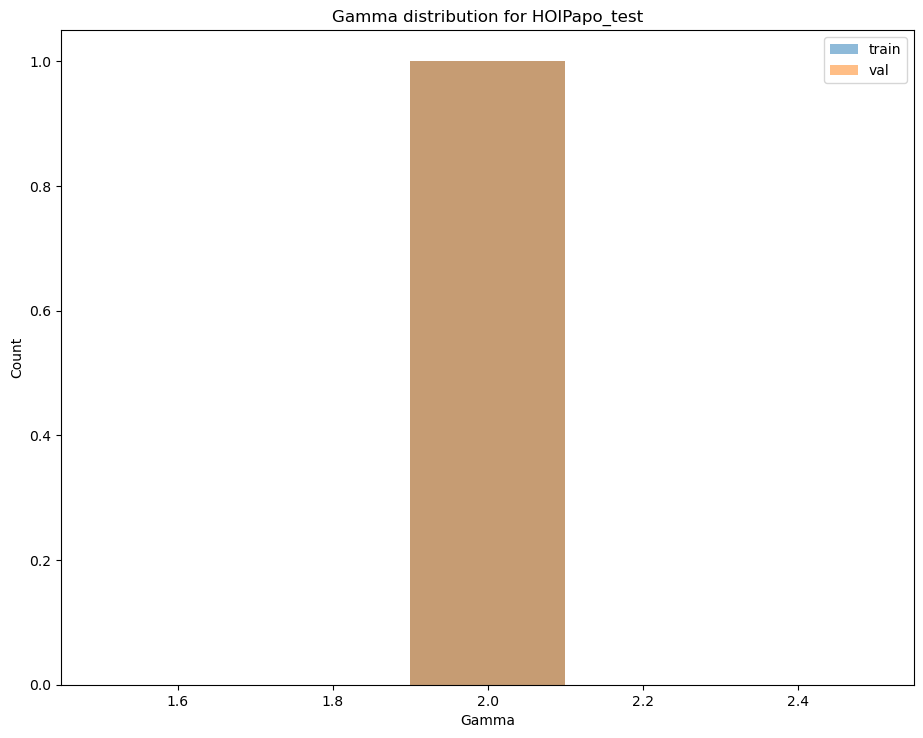

['train_HOIPapo_test_1']
['val_HOIPapo_test_1']
plot_dfracs_compare
     0.0      0.5      5.0  peptide             calc_name  ResStr  ResEnd  \
0    0.0  0.41879  0.44438        0          Experimental     NaN     NaN   
1    0.0  0.37096  0.45204        1          Experimental     NaN     NaN   
2    0.0  0.40040  0.48544        2          Experimental     NaN     NaN   
3    0.0  0.45875  0.51503        3          Experimental     NaN     NaN   
4    0.0  0.41726  0.49519        4          Experimental     NaN     NaN   
5    0.0  0.44176  0.50927        5          Experimental     NaN     NaN   
6    0.0  0.48987  0.54090        6          Experimental     NaN     NaN   
7    0.0  0.41316  0.48254        7          Experimental     NaN     NaN   
8    0.0  0.46617  0.51066        8          Experimental     NaN     NaN   
9    0.0  0.46825  0.52028        9          Experimental     NaN     NaN   
10   0.0  0.48273  0.53102       10          Experimental     NaN     NaN   
11   0.0

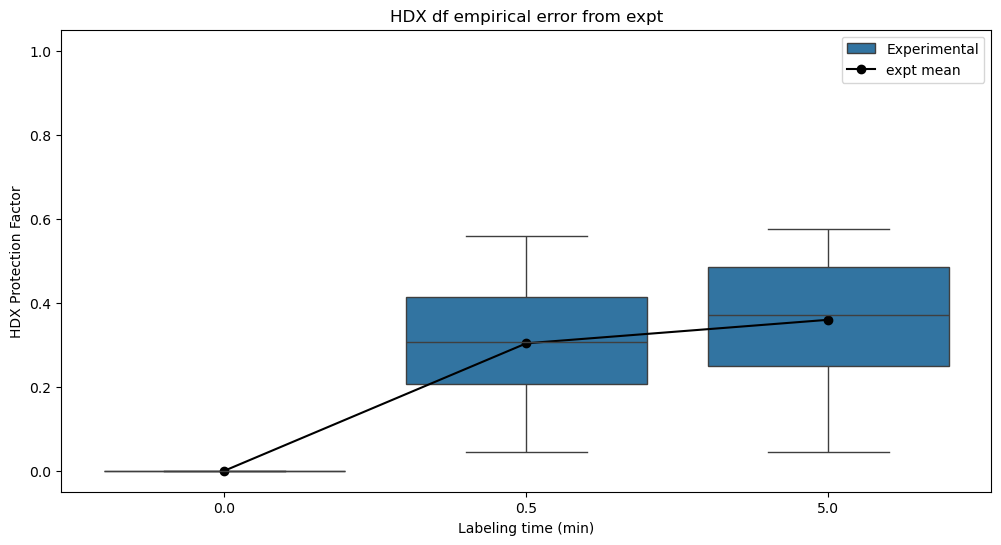

plot_dfracs_compare
     0.0      0.5      5.0  peptide             calc_name  ResStr  ResEnd  \
0    0.0  0.41879  0.44438        0          Experimental     NaN     NaN   
1    0.0  0.37096  0.45204        1          Experimental     NaN     NaN   
2    0.0  0.40040  0.48544        2          Experimental     NaN     NaN   
3    0.0  0.45875  0.51503        3          Experimental     NaN     NaN   
4    0.0  0.41726  0.49519        4          Experimental     NaN     NaN   
5    0.0  0.44176  0.50927        5          Experimental     NaN     NaN   
6    0.0  0.48987  0.54090        6          Experimental     NaN     NaN   
7    0.0  0.41316  0.48254        7          Experimental     NaN     NaN   
8    0.0  0.46617  0.51066        8          Experimental     NaN     NaN   
9    0.0  0.46825  0.52028        9          Experimental     NaN     NaN   
10   0.0  0.48273  0.53102       10          Experimental     NaN     NaN   
11   0.0  0.50258  0.53988       11          Experimenta

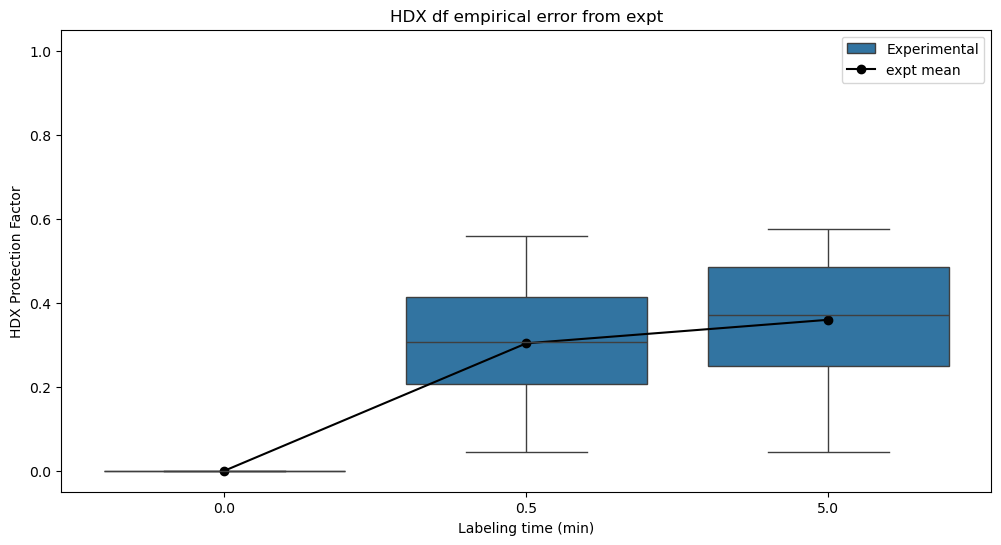

Restoring trainval peptide numbers
train_rep_names ['train_HOIPapo_test_1']
val_rep_names ['val_HOIPapo_test_1']
test_rep_names ['test_HOIPapo_test_1']
train_rep_peptides [0, 24, 25, 26, 27, 28, 30, 33, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]
val_rep_peptides [12, 13, 14, 15, 16, 17, 18, 19, 20, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]
manual merge df
    0.0  0.5

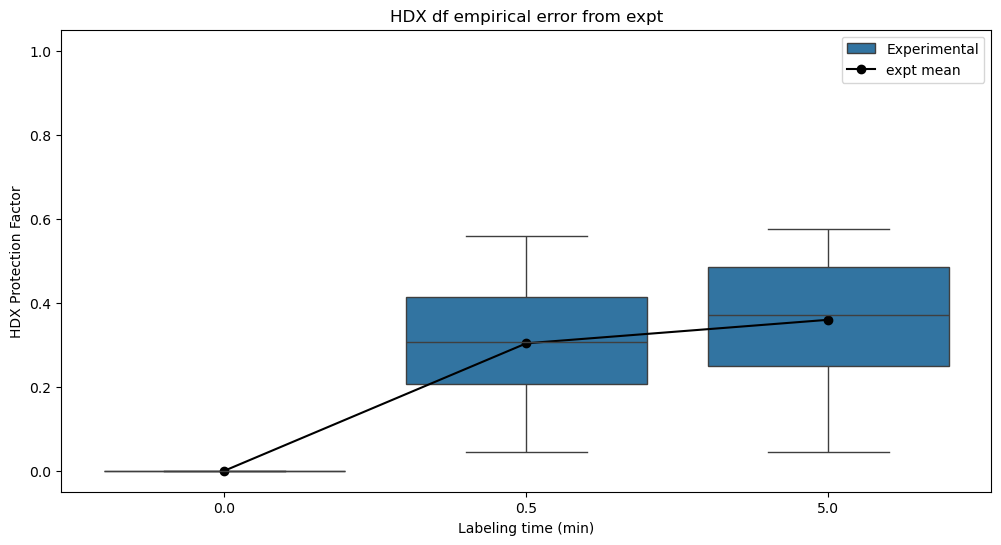

plotting paired errors
     0.0      0.5      5.0  peptide             calc_name  ResStr  ResEnd  \
0    0.0  0.41879  0.44438        0          Experimental     NaN     NaN   
1    0.0  0.37096  0.45204        1          Experimental     NaN     NaN   
2    0.0  0.40040  0.48544        2          Experimental     NaN     NaN   
3    0.0  0.45875  0.51503        3          Experimental     NaN     NaN   
4    0.0  0.41726  0.49519        4          Experimental     NaN     NaN   
5    0.0  0.44176  0.50927        5          Experimental     NaN     NaN   
6    0.0  0.48987  0.54090        6          Experimental     NaN     NaN   
7    0.0  0.41316  0.48254        7          Experimental     NaN     NaN   
8    0.0  0.46617  0.51066        8          Experimental     NaN     NaN   
9    0.0  0.46825  0.52028        9          Experimental     NaN     NaN   
10   0.0  0.48273  0.53102       10          Experimental     NaN     NaN   
11   0.0  0.50258  0.53988       11          Experime

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarn

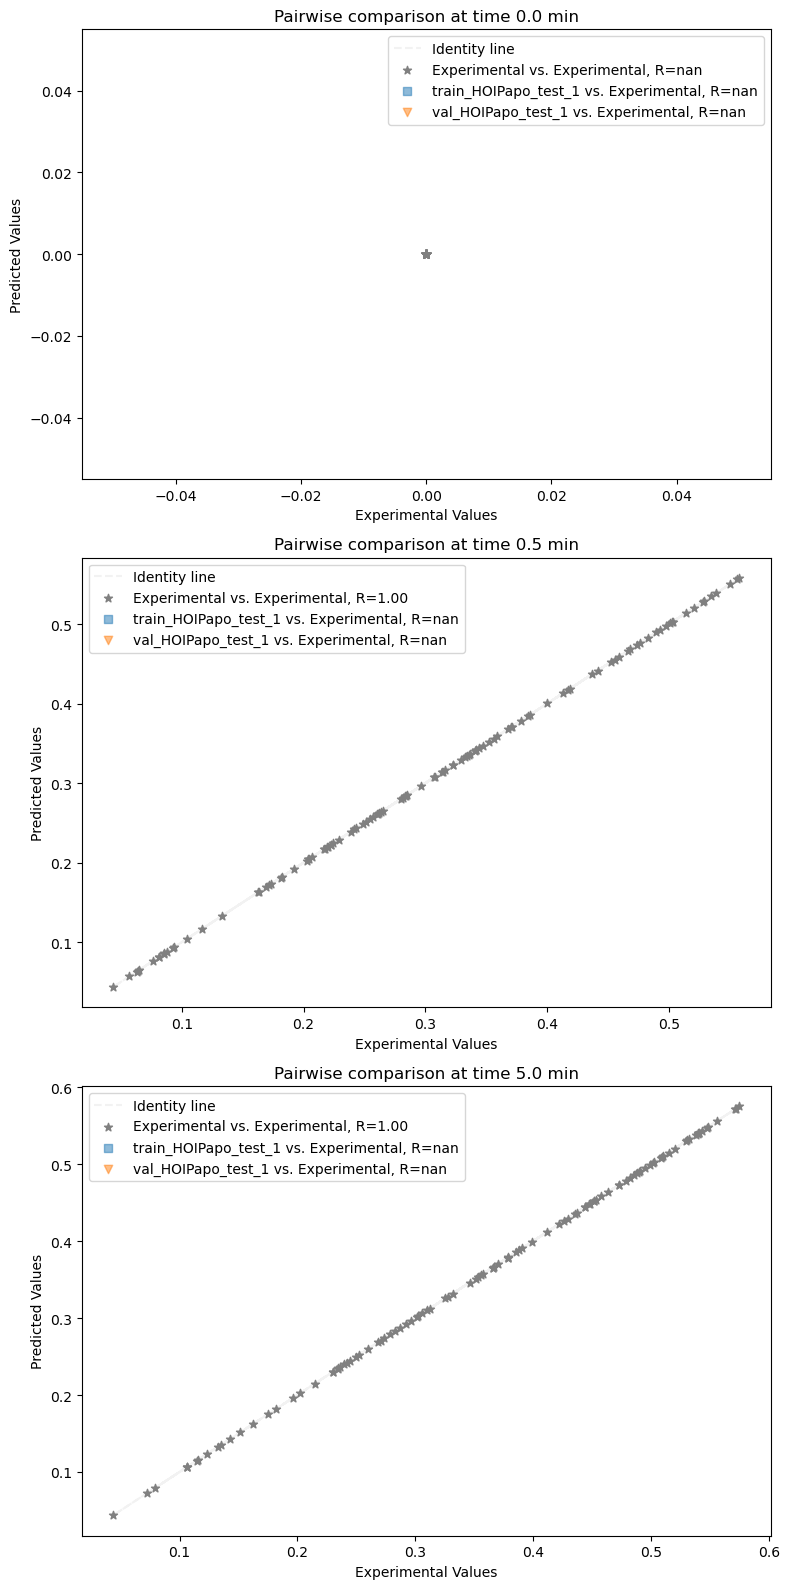

plotting paired trainval agreement
     0.0      0.5      5.0  peptide             calc_name  ResStr  ResEnd  \
0    0.0  0.41879  0.44438        0          Experimental     NaN     NaN   
1    0.0  0.37096  0.45204        1          Experimental     NaN     NaN   
2    0.0  0.40040  0.48544        2          Experimental     NaN     NaN   
3    0.0  0.45875  0.51503        3          Experimental     NaN     NaN   
4    0.0  0.41726  0.49519        4          Experimental     NaN     NaN   
5    0.0  0.44176  0.50927        5          Experimental     NaN     NaN   
6    0.0  0.48987  0.54090        6          Experimental     NaN     NaN   
7    0.0  0.41316  0.48254        7          Experimental     NaN     NaN   
8    0.0  0.46617  0.51066        8          Experimental     NaN     NaN   
9    0.0  0.46825  0.52028        9          Experimental     NaN     NaN   
10   0.0  0.48273  0.53102       10          Experimental     NaN     NaN   
11   0.0  0.50258  0.53988       11      

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/

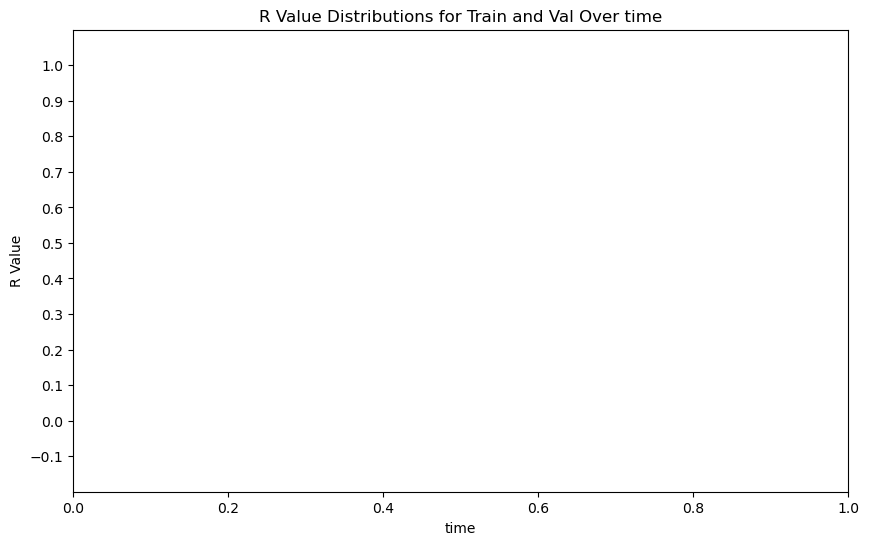

nan_df
     0.0  0.5  5.0  peptide             calc_name  ResStr  ResEnd  \
0    NaN  NaN  NaN        0  train_HOIPapo_test_1     NaN     NaN   
1    NaN  NaN  NaN       24  train_HOIPapo_test_1     NaN     NaN   
2    NaN  NaN  NaN       25  train_HOIPapo_test_1     NaN     NaN   
3    NaN  NaN  NaN       26  train_HOIPapo_test_1     NaN     NaN   
4    NaN  NaN  NaN       27  train_HOIPapo_test_1     NaN     NaN   
5    NaN  NaN  NaN       28  train_HOIPapo_test_1     NaN     NaN   
6    NaN  NaN  NaN       30  train_HOIPapo_test_1     NaN     NaN   
7    NaN  NaN  NaN       33  train_HOIPapo_test_1     NaN     NaN   
8    NaN  NaN  NaN       70  train_HOIPapo_test_1     NaN     NaN   
9    NaN  NaN  NaN       71  train_HOIPapo_test_1     NaN     NaN   
10   NaN  NaN  NaN       72  train_HOIPapo_test_1     NaN     NaN   
11   NaN  NaN  NaN       73  train_HOIPapo_test_1     NaN     NaN   
12   NaN  NaN  NaN       74  train_HOIPapo_test_1     NaN     NaN   
13   NaN  NaN  NaN       75

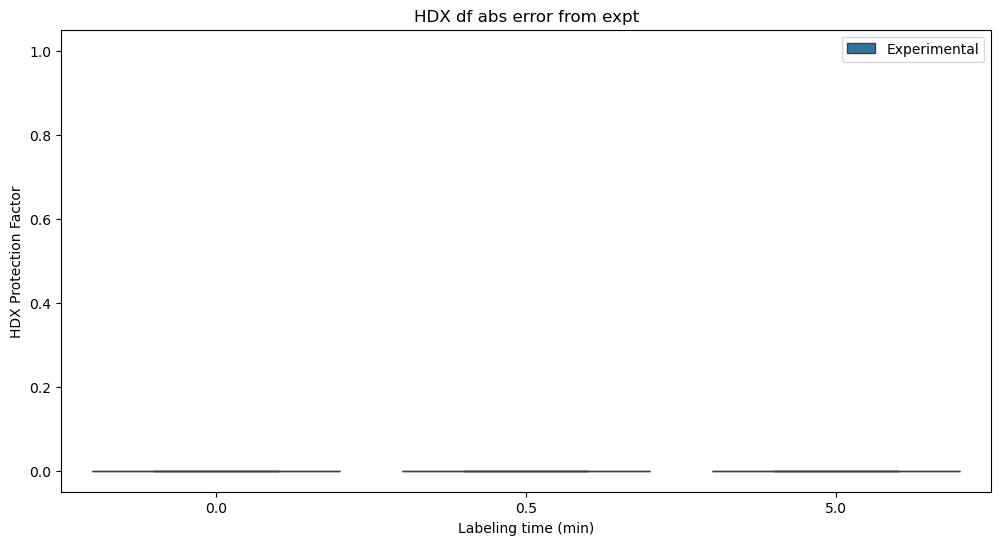

plot_dfracs_compare_MSE
     0.0      0.5      5.0  peptide             calc_name  ResStr  ResEnd  \
0    NaN      NaN      NaN        0  train_HOIPapo_test_1     NaN     NaN   
1    NaN      NaN      NaN       24  train_HOIPapo_test_1     NaN     NaN   
2    NaN      NaN      NaN       25  train_HOIPapo_test_1     NaN     NaN   
3    NaN      NaN      NaN       26  train_HOIPapo_test_1     NaN     NaN   
4    NaN      NaN      NaN       27  train_HOIPapo_test_1     NaN     NaN   
5    NaN      NaN      NaN       28  train_HOIPapo_test_1     NaN     NaN   
6    NaN      NaN      NaN       30  train_HOIPapo_test_1     NaN     NaN   
7    NaN      NaN      NaN       33  train_HOIPapo_test_1     NaN     NaN   
8    NaN      NaN      NaN       70  train_HOIPapo_test_1     NaN     NaN   
9    NaN      NaN      NaN       71  train_HOIPapo_test_1     NaN     NaN   
10   NaN      NaN      NaN       72  train_HOIPapo_test_1     NaN     NaN   
11   NaN      NaN      NaN       73  train_HOIPapo_t

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:741: RuntimeWarning: Mean of empty slice
  mse = np.nanmean(difference_sq)


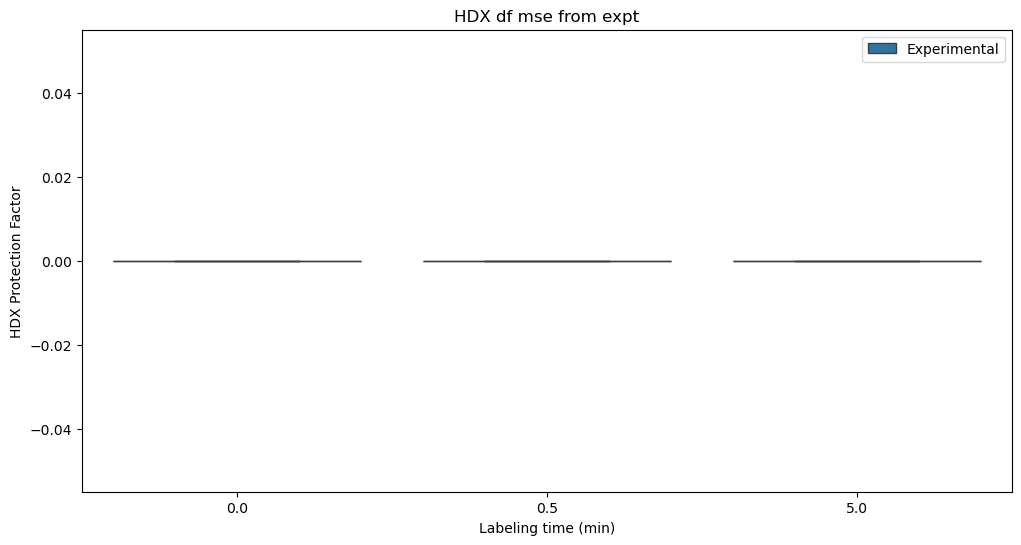

Train coverage: 0.00
Val coverage: 0.00
plot_dfracs_compare
     0.0      0.5      5.0  peptide     calc_name  ResStr  ResEnd path
0    0.0  0.41879  0.44438        0  Experimental     NaN     NaN  NaN
1    0.0  0.37096  0.45204        1  Experimental     NaN     NaN  NaN
2    0.0  0.40040  0.48544        2  Experimental     NaN     NaN  NaN
3    0.0  0.45875  0.51503        3  Experimental     NaN     NaN  NaN
4    0.0  0.41726  0.49519        4  Experimental     NaN     NaN  NaN
5    0.0  0.44176  0.50927        5  Experimental     NaN     NaN  NaN
6    0.0  0.48987  0.54090        6  Experimental     NaN     NaN  NaN
7    0.0  0.41316  0.48254        7  Experimental     NaN     NaN  NaN
8    0.0  0.46617  0.51066        8  Experimental     NaN     NaN  NaN
9    0.0  0.46825  0.52028        9  Experimental     NaN     NaN  NaN
10   0.0  0.48273  0.53102       10  Experimental     NaN     NaN  NaN
11   0.0  0.50258  0.53988       11  Experimental     NaN     NaN  NaN
12   0.0  0.47373

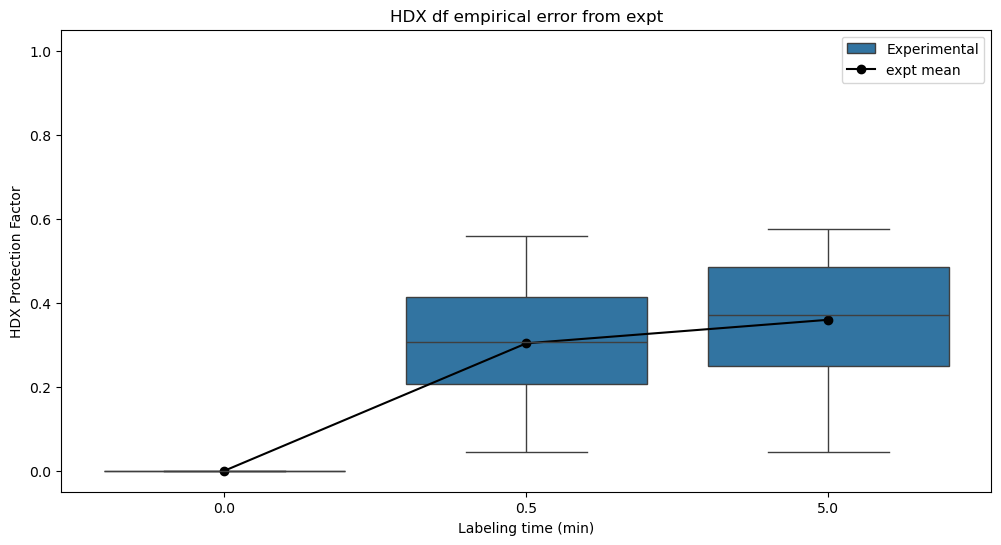

plotting paired errors
     0.0      0.5      5.0  peptide     calc_name  ResStr  ResEnd path
0    0.0  0.41879  0.44438        0  Experimental     NaN     NaN  NaN
1    0.0  0.37096  0.45204        1  Experimental     NaN     NaN  NaN
2    0.0  0.40040  0.48544        2  Experimental     NaN     NaN  NaN
3    0.0  0.45875  0.51503        3  Experimental     NaN     NaN  NaN
4    0.0  0.41726  0.49519        4  Experimental     NaN     NaN  NaN
5    0.0  0.44176  0.50927        5  Experimental     NaN     NaN  NaN
6    0.0  0.48987  0.54090        6  Experimental     NaN     NaN  NaN
7    0.0  0.41316  0.48254        7  Experimental     NaN     NaN  NaN
8    0.0  0.46617  0.51066        8  Experimental     NaN     NaN  NaN
9    0.0  0.46825  0.52028        9  Experimental     NaN     NaN  NaN
10   0.0  0.48273  0.53102       10  Experimental     NaN     NaN  NaN
11   0.0  0.50258  0.53988       11  Experimental     NaN     NaN  NaN
12   0.0  0.47373  0.50144       12  Experimental     

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarn

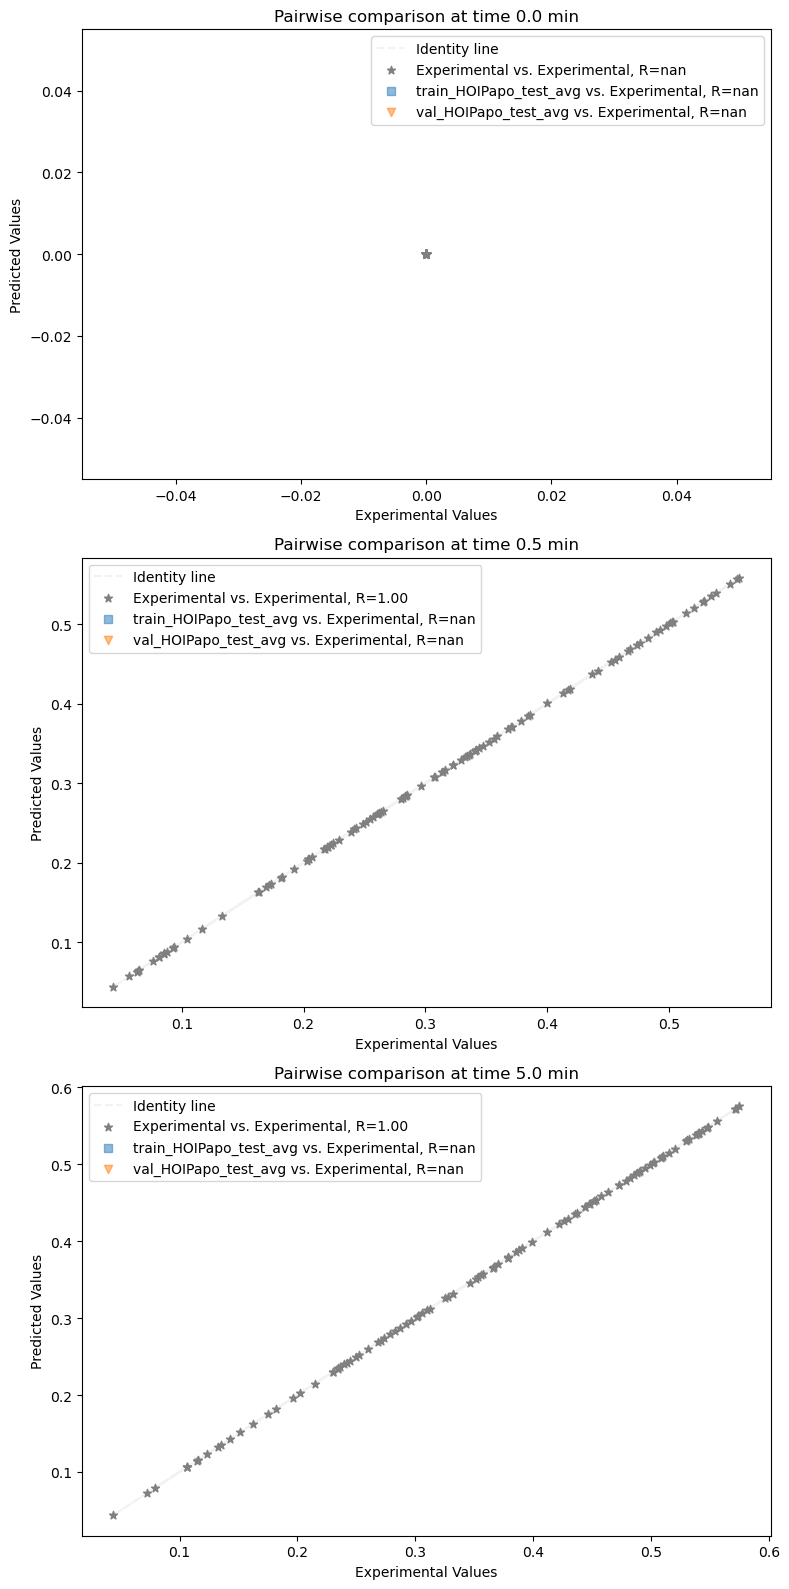

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


Saving experiment to:  logs/AvsB_S39_1707940652.pkl
Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
Experiment name LvsX_SR already exists. Attempting to change name to LvsX_SR0
Experiment name LvsX_SR already exists. Attempting to change name to LvsX_SR1
Experiment name LvsX_SR already exists. Attempting to change name to LvsX_SR2
Experiment name LvsX_SR already exists. Attempting to change name to LvsX_SR3
Experiment name LvsX_SR already exists. Attempting to change name to LvsX_SR4
Experiment name LvsX_SR already exists. Attempting to change name to LvsX_SR5
Experiment name LvsX_SR already exists. Attempting to change name to LvsX_SR6
Experiment name LvsX_SR already exists. Attempting to change name to LvsX_SR7
Experiment name LvsX_SR already exists. Attempting to change name to LvsX_SR8
Experiment name LvsX_SR already exists. Attempting to change name to LvsX_SR9
Experiment name LvsX_SR already exists. Attempting to change name to LvsX_SR10
Experiment name Lv

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HOIP/HOIP_apo/alphafold_H/HOIPapo_unrelaxed_rank_003_alphafold2_ptm_model_4_seed_000_H_small.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HOIP/HOIP_apo/alphafold_H/HOIPapo_unrelaxed_rank_003_alphafold2_ptm_model_4_seed_000_H.pdb -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR14/train_HOIPapo_test_1/calc_hdx_train_HOIPapo_test_1.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR14/train_HOIPapo_test_1/out__train_HOIPapo_test_1 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexus365

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a


Residue predictions complete


/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR14/train_HOIPapo_test_1/out__train_HOIPapo_test_1Segment_average_fractions.dat
AVG: ncol = 5, len(names) = 3
Experimental HOIPapo_test True 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR14/train_HOIPapo_test_1/train_HOIPapo_test_1_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR14/train_HOIPapo_test_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR14/train_HOIPapo_test_1/out__train_HOIPapo_test_1Intrinsic_rates.dat
REWIGHTING train_HOIPapo_test_1 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR14/train_HOIPap

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR14/train_HOIPapo_test_1/reweighting_gamma_2x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR14/train_HOIPapo_test_1/reweighting_gamma_4x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR14/train_HOIPapo_test_1/reweighting_gamma_3x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR14/train_HOIPapo_test_1/reweighting_gamma_5x10^0
Contacts read
Hbonds read
Contacts read
Hbonds read
Contacts read
Hbonds read
Contacts read
Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/reweighting.py:503: RuntimeWarning: Mean of empty slice
  _curr_segment_dfracs = np.nanmean(self.runvalues['curr_residue_dfracs'], axis=1)
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/reweighting.py:503: RuntimeWarning: Mean of empty slice
  _curr_segment_dfracs = np.nanmean(self.runvalues['curr_residue_dfracs'], axis=1)
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/reweighting.py:503: RuntimeWarning: Mean of empty slice
  _curr_segment_dfracs = np.nanmean(self.runvalues['curr_residue_dfracs'], axis=1)
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/reweighting.py:503: RuntimeWarning: Mean of empty slice
  _curr_segment_dfracs = np.nanmean(self.runvalues['curr_residue_dfracs'], axis=1)
/Users/alexi/Library/CloudStorage/OneDri

         523237 function calls (522229 primitive calls) in 0.786 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.788    0.788 /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/reweighting.py:920(run)
        1    0.000    0.000    0.522    0.522 /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/reweighting.py:844(make_iteration)
        1    0.189    0.189    0.521    0.521 /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/reweighting.py:559(optimize_parameters_gradient)
        1    0.000    0.000    0.263    0.263 /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/reweighting.py:76(setup_no_runobj)
        1    0.000    0.000    0.259    0.259 /Users/alexi/Library/CloudStorage/OneDrive-Ne

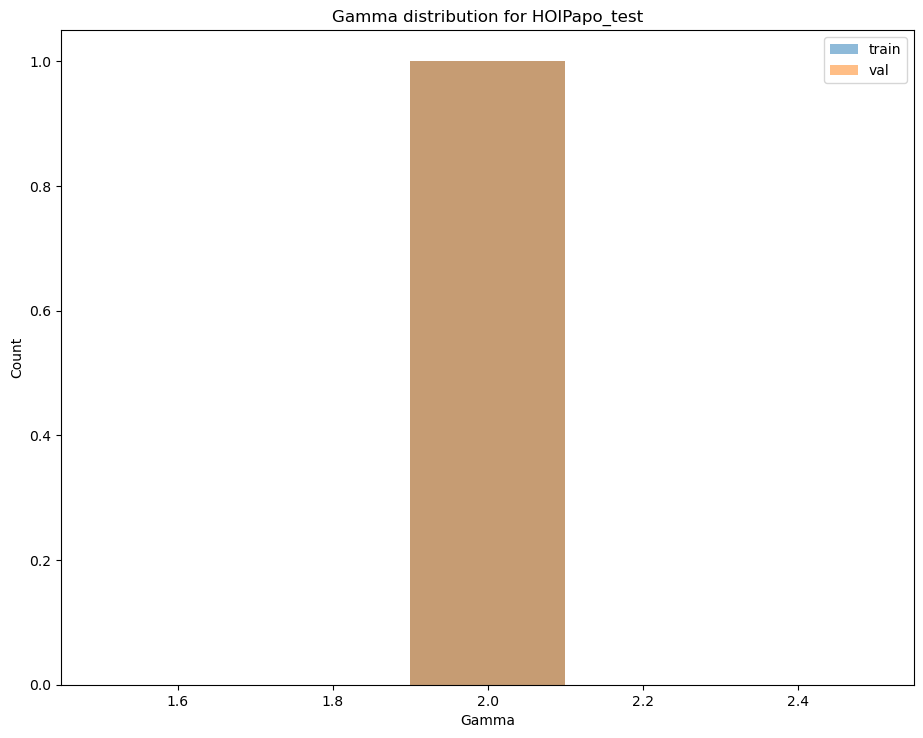

['train_HOIPapo_test_1']
['val_HOIPapo_test_1']
plot_dfracs_compare
     0.0      0.5      5.0  peptide             calc_name  ResStr  ResEnd  \
0    0.0  0.41879  0.44438        0          Experimental     NaN     NaN   
1    0.0  0.37096  0.45204        1          Experimental     NaN     NaN   
2    0.0  0.40040  0.48544        2          Experimental     NaN     NaN   
3    0.0  0.45875  0.51503        3          Experimental     NaN     NaN   
4    0.0  0.41726  0.49519        4          Experimental     NaN     NaN   
5    0.0  0.44176  0.50927        5          Experimental     NaN     NaN   
6    0.0  0.48987  0.54090        6          Experimental     NaN     NaN   
7    0.0  0.41316  0.48254        7          Experimental     NaN     NaN   
8    0.0  0.46617  0.51066        8          Experimental     NaN     NaN   
9    0.0  0.46825  0.52028        9          Experimental     NaN     NaN   
10   0.0  0.48273  0.53102       10          Experimental     NaN     NaN   
11   0.0

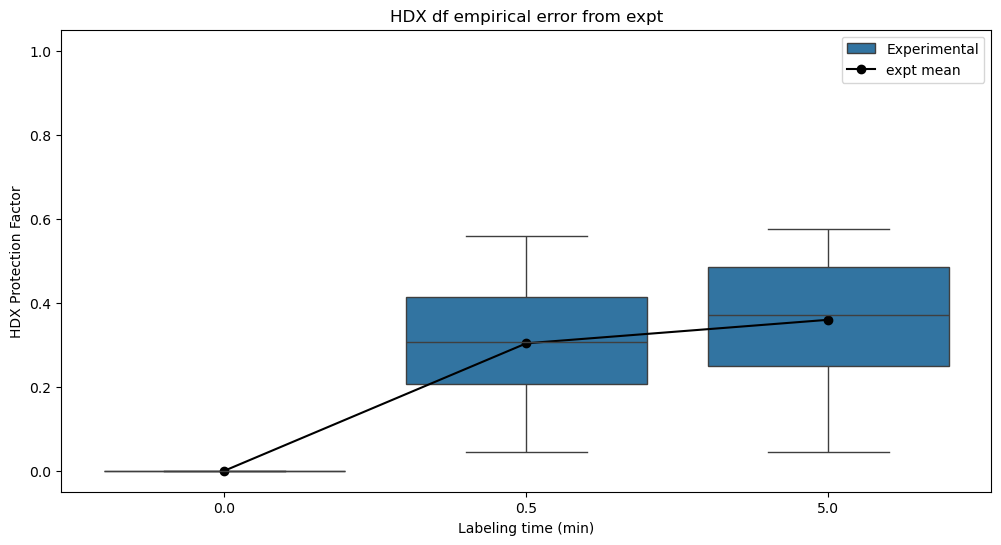

plot_dfracs_compare
     0.0      0.5      5.0  peptide             calc_name  ResStr  ResEnd  \
0    0.0  0.41879  0.44438        0          Experimental     NaN     NaN   
1    0.0  0.37096  0.45204        1          Experimental     NaN     NaN   
2    0.0  0.40040  0.48544        2          Experimental     NaN     NaN   
3    0.0  0.45875  0.51503        3          Experimental     NaN     NaN   
4    0.0  0.41726  0.49519        4          Experimental     NaN     NaN   
5    0.0  0.44176  0.50927        5          Experimental     NaN     NaN   
6    0.0  0.48987  0.54090        6          Experimental     NaN     NaN   
7    0.0  0.41316  0.48254        7          Experimental     NaN     NaN   
8    0.0  0.46617  0.51066        8          Experimental     NaN     NaN   
9    0.0  0.46825  0.52028        9          Experimental     NaN     NaN   
10   0.0  0.48273  0.53102       10          Experimental     NaN     NaN   
11   0.0  0.50258  0.53988       11          Experimenta

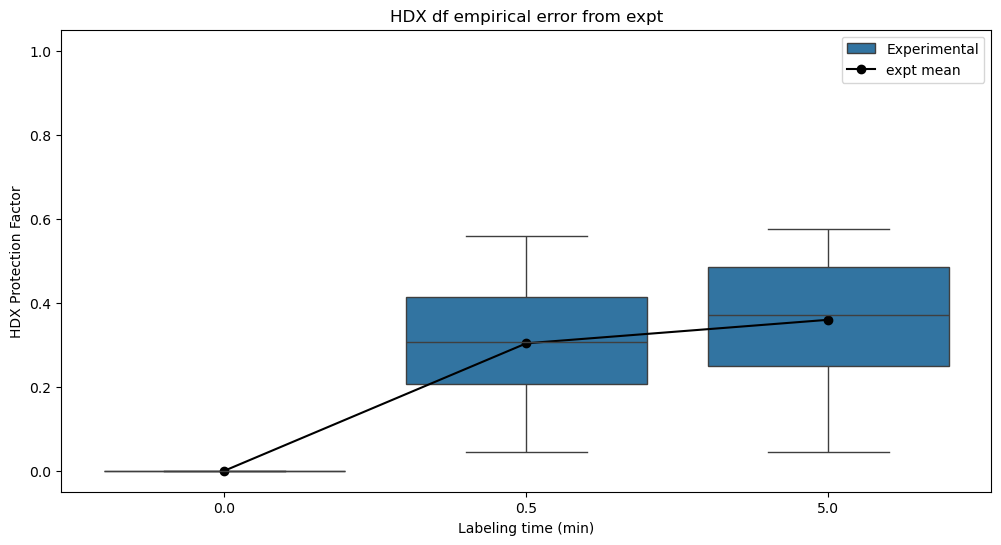

Restoring trainval peptide numbers
train_rep_names ['train_HOIPapo_test_1']
val_rep_names ['val_HOIPapo_test_1']
test_rep_names ['test_HOIPapo_test_1']
train_rep_peptides [17, 18, 19, 20, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 70, 72]
val_rep_peptides [79, 80]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]
manual merge df
    0.0  0.5  5.0  peptide             calc_name  ResStr  ResEnd  \
0   NaN  NaN  NaN       17  train_HOIPapo_test_1     NaN     NaN   
1   NaN  NaN  NaN       18  train_HOIPapo_test_1     NaN     NaN   
2   NaN  NaN  NaN       19  train_HOIPapo_test_1     NaN    

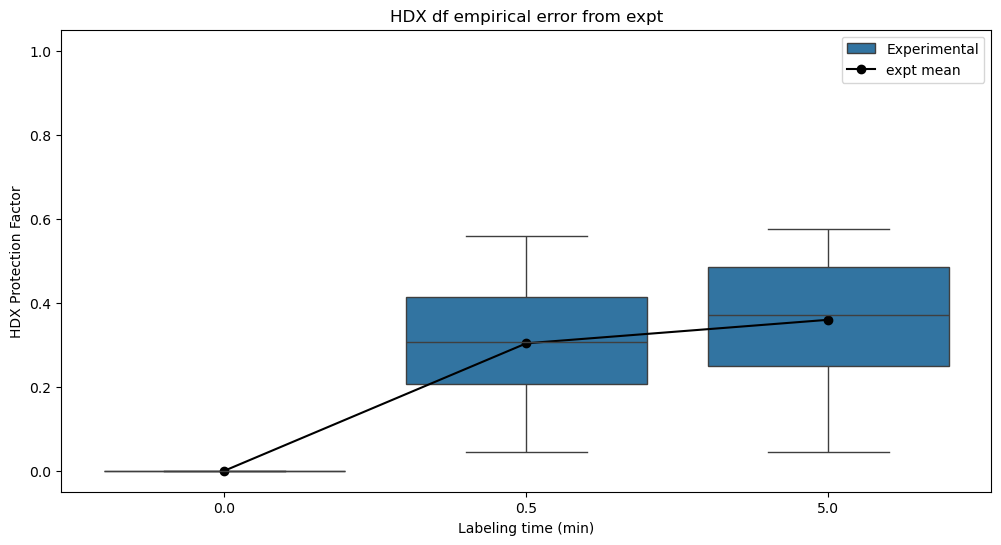

plotting paired errors
     0.0      0.5      5.0  peptide             calc_name  ResStr  ResEnd  \
0    0.0  0.41879  0.44438        0          Experimental     NaN     NaN   
1    0.0  0.37096  0.45204        1          Experimental     NaN     NaN   
2    0.0  0.40040  0.48544        2          Experimental     NaN     NaN   
3    0.0  0.45875  0.51503        3          Experimental     NaN     NaN   
4    0.0  0.41726  0.49519        4          Experimental     NaN     NaN   
5    0.0  0.44176  0.50927        5          Experimental     NaN     NaN   
6    0.0  0.48987  0.54090        6          Experimental     NaN     NaN   
7    0.0  0.41316  0.48254        7          Experimental     NaN     NaN   
8    0.0  0.46617  0.51066        8          Experimental     NaN     NaN   
9    0.0  0.46825  0.52028        9          Experimental     NaN     NaN   
10   0.0  0.48273  0.53102       10          Experimental     NaN     NaN   
11   0.0  0.50258  0.53988       11          Experime

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarn

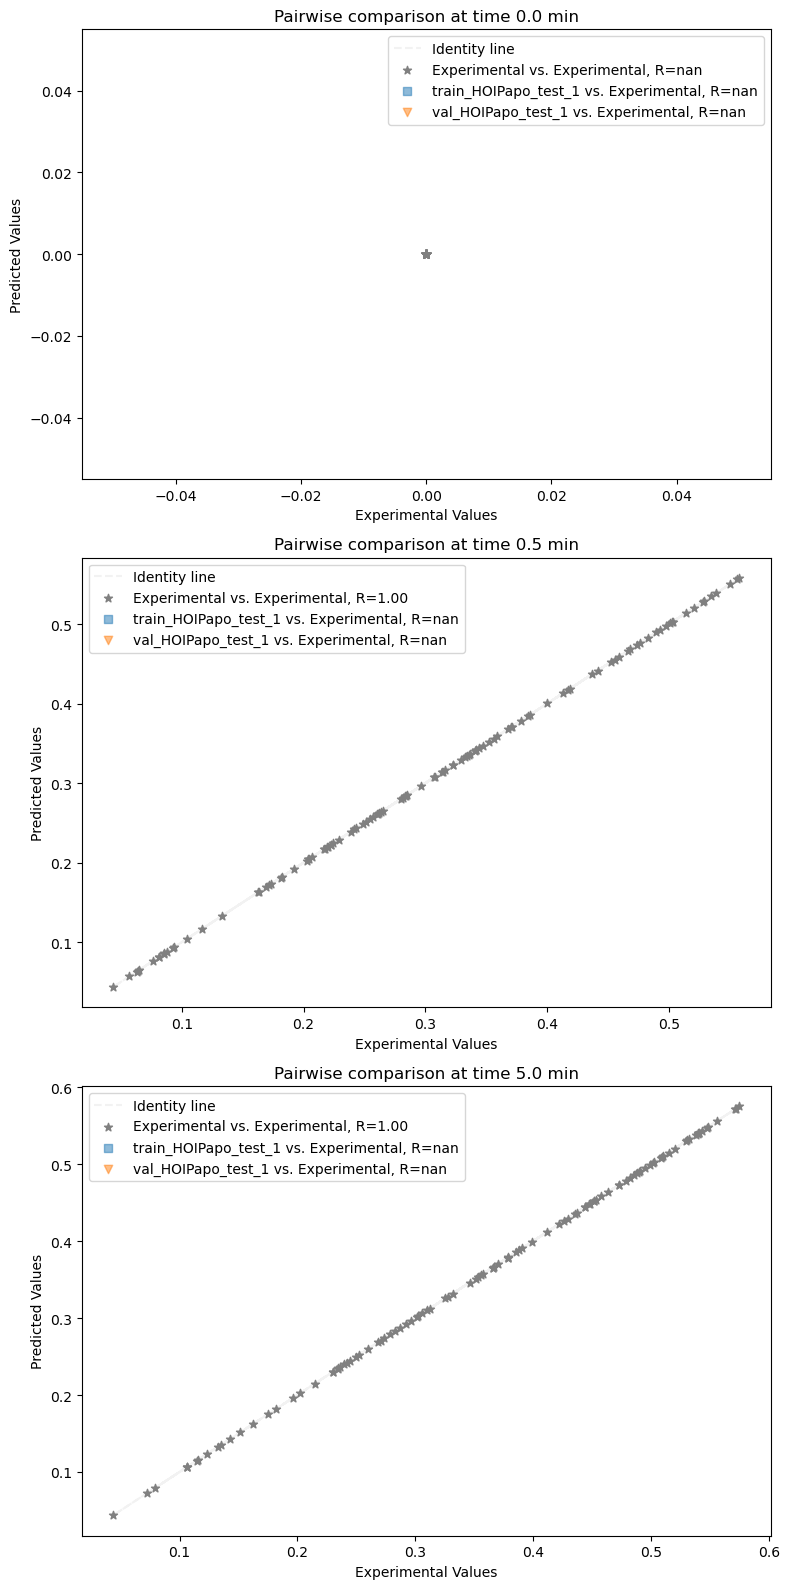

plotting paired trainval agreement
     0.0      0.5      5.0  peptide             calc_name  ResStr  ResEnd  \
0    0.0  0.41879  0.44438        0          Experimental     NaN     NaN   
1    0.0  0.37096  0.45204        1          Experimental     NaN     NaN   
2    0.0  0.40040  0.48544        2          Experimental     NaN     NaN   
3    0.0  0.45875  0.51503        3          Experimental     NaN     NaN   
4    0.0  0.41726  0.49519        4          Experimental     NaN     NaN   
5    0.0  0.44176  0.50927        5          Experimental     NaN     NaN   
6    0.0  0.48987  0.54090        6          Experimental     NaN     NaN   
7    0.0  0.41316  0.48254        7          Experimental     NaN     NaN   
8    0.0  0.46617  0.51066        8          Experimental     NaN     NaN   
9    0.0  0.46825  0.52028        9          Experimental     NaN     NaN   
10   0.0  0.48273  0.53102       10          Experimental     NaN     NaN   
11   0.0  0.50258  0.53988       11      

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/

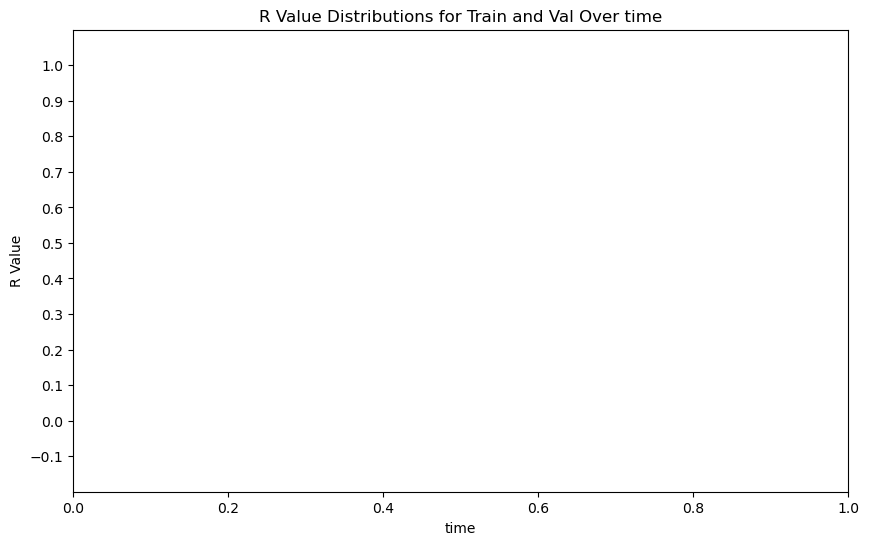

nan_df
    0.0  0.5  5.0  peptide             calc_name  ResStr  ResEnd  \
0   NaN  NaN  NaN       17  train_HOIPapo_test_1     NaN     NaN   
1   NaN  NaN  NaN       18  train_HOIPapo_test_1     NaN     NaN   
2   NaN  NaN  NaN       19  train_HOIPapo_test_1     NaN     NaN   
3   NaN  NaN  NaN       20  train_HOIPapo_test_1     NaN     NaN   
4   NaN  NaN  NaN       35  train_HOIPapo_test_1     NaN     NaN   
5   NaN  NaN  NaN       36  train_HOIPapo_test_1     NaN     NaN   
6   NaN  NaN  NaN       37  train_HOIPapo_test_1     NaN     NaN   
7   NaN  NaN  NaN       38  train_HOIPapo_test_1     NaN     NaN   
8   NaN  NaN  NaN       39  train_HOIPapo_test_1     NaN     NaN   
9   NaN  NaN  NaN       40  train_HOIPapo_test_1     NaN     NaN   
10  NaN  NaN  NaN       41  train_HOIPapo_test_1     NaN     NaN   
11  NaN  NaN  NaN       42  train_HOIPapo_test_1     NaN     NaN   
12  NaN  NaN  NaN       43  train_HOIPapo_test_1     NaN     NaN   
13  NaN  NaN  NaN       44  train_HOIPapo

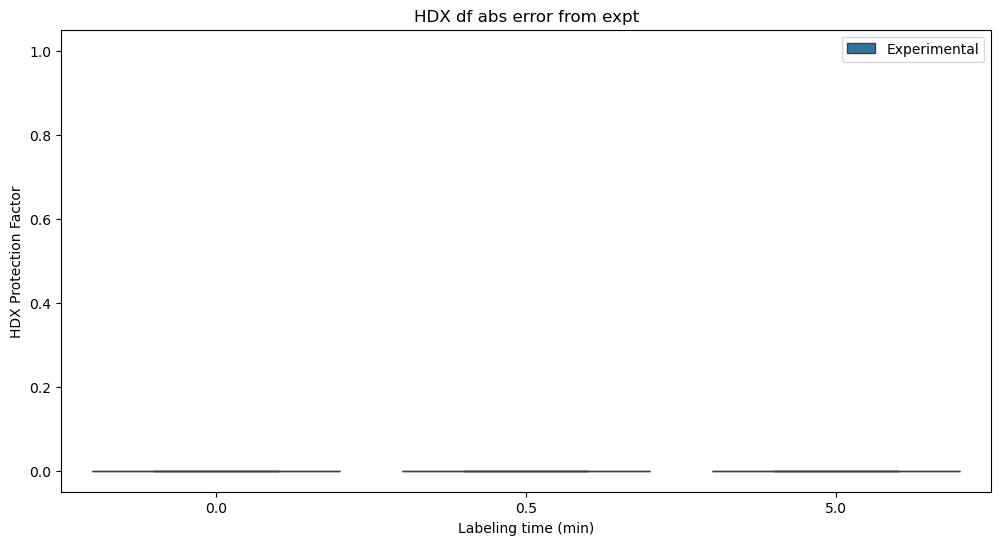

plot_dfracs_compare_MSE
     0.0      0.5      5.0  peptide             calc_name  ResStr  ResEnd  \
0    NaN      NaN      NaN       17  train_HOIPapo_test_1     NaN     NaN   
1    NaN      NaN      NaN       18  train_HOIPapo_test_1     NaN     NaN   
2    NaN      NaN      NaN       19  train_HOIPapo_test_1     NaN     NaN   
3    NaN      NaN      NaN       20  train_HOIPapo_test_1     NaN     NaN   
4    NaN      NaN      NaN       35  train_HOIPapo_test_1     NaN     NaN   
5    NaN      NaN      NaN       36  train_HOIPapo_test_1     NaN     NaN   
6    NaN      NaN      NaN       37  train_HOIPapo_test_1     NaN     NaN   
7    NaN      NaN      NaN       38  train_HOIPapo_test_1     NaN     NaN   
8    NaN      NaN      NaN       39  train_HOIPapo_test_1     NaN     NaN   
9    NaN      NaN      NaN       40  train_HOIPapo_test_1     NaN     NaN   
10   NaN      NaN      NaN       41  train_HOIPapo_test_1     NaN     NaN   
11   NaN      NaN      NaN       42  train_HOIPapo_t

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:741: RuntimeWarning: Mean of empty slice
  mse = np.nanmean(difference_sq)


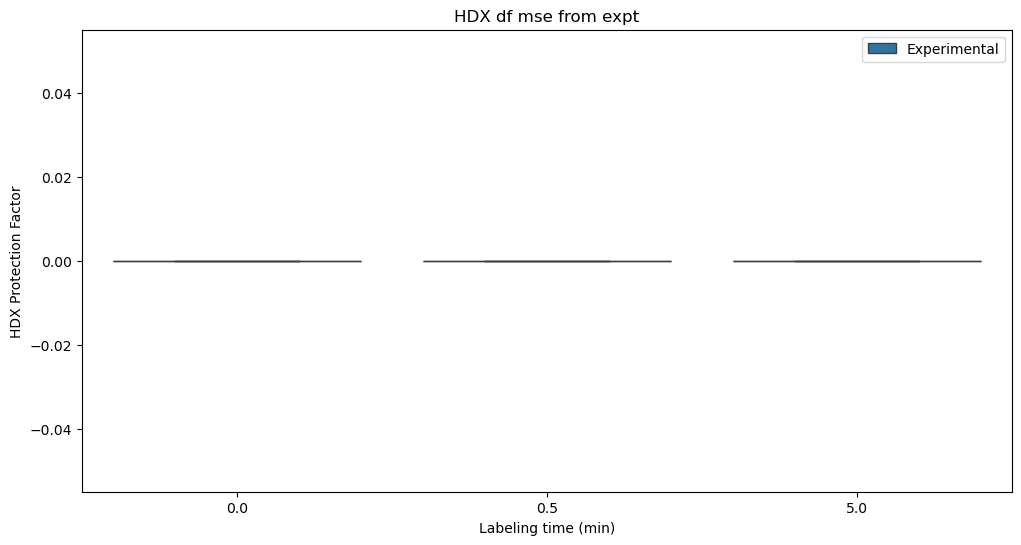

Train coverage: 0.00
Val coverage: 0.00
plot_dfracs_compare
     0.0      0.5      5.0  peptide     calc_name  ResStr  ResEnd path
0    0.0  0.41879  0.44438        0  Experimental     NaN     NaN  NaN
1    0.0  0.37096  0.45204        1  Experimental     NaN     NaN  NaN
2    0.0  0.40040  0.48544        2  Experimental     NaN     NaN  NaN
3    0.0  0.45875  0.51503        3  Experimental     NaN     NaN  NaN
4    0.0  0.41726  0.49519        4  Experimental     NaN     NaN  NaN
5    0.0  0.44176  0.50927        5  Experimental     NaN     NaN  NaN
6    0.0  0.48987  0.54090        6  Experimental     NaN     NaN  NaN
7    0.0  0.41316  0.48254        7  Experimental     NaN     NaN  NaN
8    0.0  0.46617  0.51066        8  Experimental     NaN     NaN  NaN
9    0.0  0.46825  0.52028        9  Experimental     NaN     NaN  NaN
10   0.0  0.48273  0.53102       10  Experimental     NaN     NaN  NaN
11   0.0  0.50258  0.53988       11  Experimental     NaN     NaN  NaN
12   0.0  0.47373

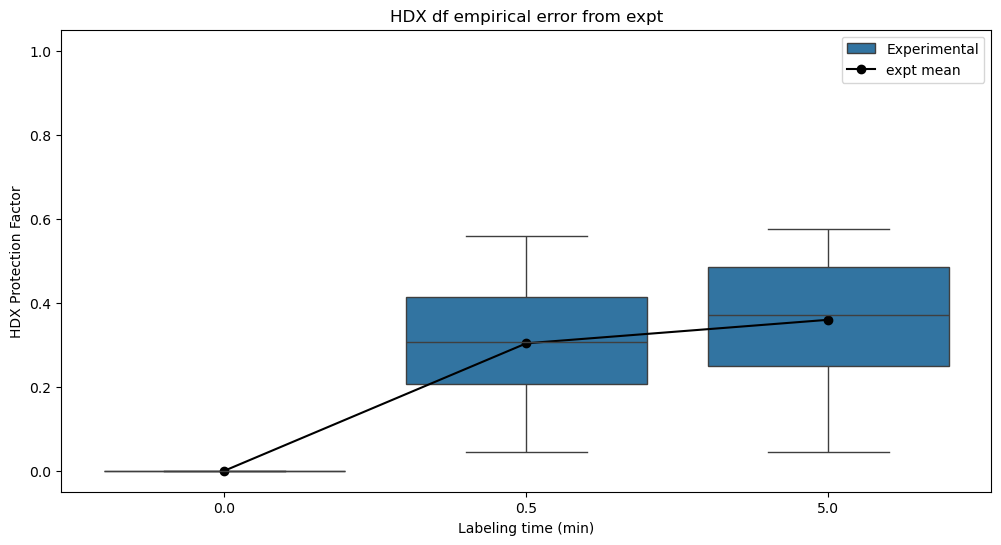

plotting paired errors
     0.0      0.5      5.0  peptide     calc_name  ResStr  ResEnd path
0    0.0  0.41879  0.44438        0  Experimental     NaN     NaN  NaN
1    0.0  0.37096  0.45204        1  Experimental     NaN     NaN  NaN
2    0.0  0.40040  0.48544        2  Experimental     NaN     NaN  NaN
3    0.0  0.45875  0.51503        3  Experimental     NaN     NaN  NaN
4    0.0  0.41726  0.49519        4  Experimental     NaN     NaN  NaN
5    0.0  0.44176  0.50927        5  Experimental     NaN     NaN  NaN
6    0.0  0.48987  0.54090        6  Experimental     NaN     NaN  NaN
7    0.0  0.41316  0.48254        7  Experimental     NaN     NaN  NaN
8    0.0  0.46617  0.51066        8  Experimental     NaN     NaN  NaN
9    0.0  0.46825  0.52028        9  Experimental     NaN     NaN  NaN
10   0.0  0.48273  0.53102       10  Experimental     NaN     NaN  NaN
11   0.0  0.50258  0.53988       11  Experimental     NaN     NaN  NaN
12   0.0  0.47373  0.50144       12  Experimental     

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarn

1.0
train_HOIPapo_test_avg values
Series([], Name: 0.5, dtype: float64)
[]
Values to compute R values
[]
[]
nan
val_HOIPapo_test_avg values
Series([], Name: 0.5, dtype: float64)
[]
Values to compute R values
[]
[]
nan
expt values
[0.44438, 0.45204, 0.48544, 0.51503, 0.49519, 0.50927, 0.5409, 0.48254, 0.51066, 0.52028, 0.53102, 0.53988, 0.50144, 0.54102, 0.5564, 0.57504, 0.57196, 0.54827, 0.27883, 0.28686, 0.27353, 0.41205, 0.39928, 0.42213, 0.35617, 0.35125, 0.3883, 0.29602, 0.33185, 0.39085, 0.34619, 0.37857, 0.38565, 0.3786, 0.44775, 0.4639, 0.45807, 0.44393, 0.43533, 0.48976, 0.4294, 0.50293, 0.45181, 0.43697, 0.47284, 0.48848, 0.3104, 0.28305, 0.37045, 0.5085, 0.54326, 0.29208, 0.23972, 0.23003, 0.30267, 0.30614, 0.32801, 0.53974, 0.45372, 0.52972, 0.54735, 0.57156, 0.53212, 0.53827, 0.35365, 0.32548, 0.35786, 0.36568, 0.30174, 0.36567, 0.44869, 0.31226, 0.37879, 0.26839, 0.25989, 0.23593, 0.1514, 0.18143, 0.42601, 0.21472, 0.17496, 0.07274, 0.11464, 0.13526, 0.13242, 0.14304, 0.07

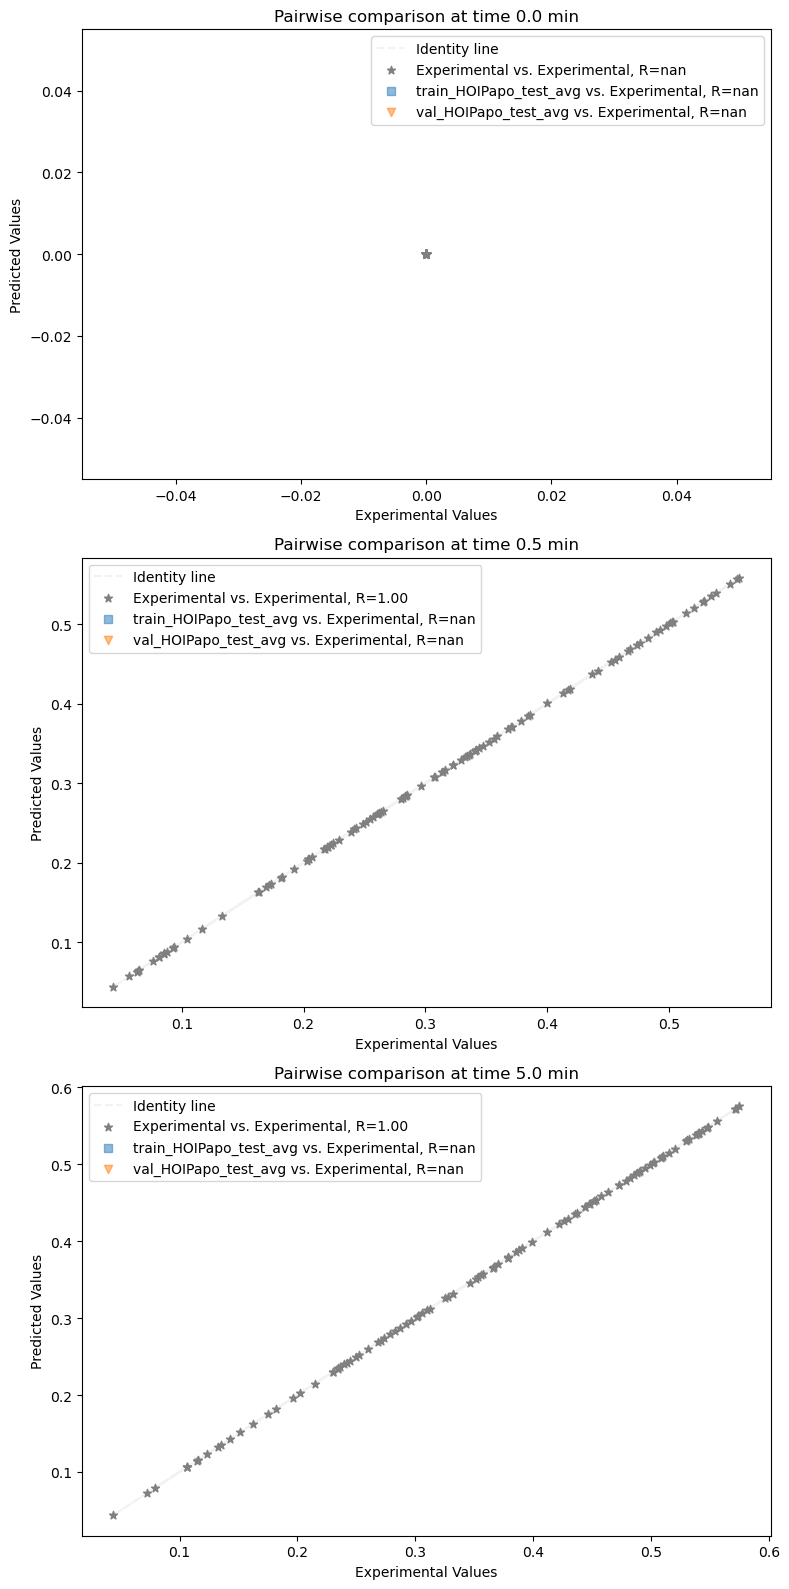

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


Saving experiment to:  logs/LvsX_SR14_1707940792.pkl
Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
Experiment name mixAandB_Sp already exists. Attempting to change name to mixAandB_Sp0
Experiment name mixAandB_Sp already exists. Attempting to change name to mixAandB_Sp1
Experiment name mixAandB_Sp already exists. Attempting to change name to mixAandB_Sp2
Experiment name mixAandB_Sp already exists. Attempting to change name to mixAandB_Sp3
Experiment name mixAandB_Sp already exists. Attempting to change name to mixAandB_Sp4
Experiment name mixAandB_Sp already exists. Attempting to change name to mixAandB_Sp5
Experiment name mixAandB_Sp already exists. Attempting to change name to mixAandB_Sp6
Experiment name mixAandB_Sp already exists. Attempting to change name to mixAandB_Sp7
Experiment name mixAandB_Sp already exists. Attempting to change name to mixAandB_Sp8
Experiment name mixAandB_Sp already exists. Attempting to change name to mixAandB_Sp9
Preparing HDX da

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX

Saved train HOIPapo_test_1 segments to /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp9/train_HOIPapo_test_1/train_residue_segs__HOIPapo_test_.txt
Train Peptide numbers: [17 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 68]
Saved val HOIPapo_test_1 segments to /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp9/val_HOIPapo_test_1/val_residue_segs__HOIPapo_test_.txt
Val Peptide numbers: [  0  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107]
train_HDX_data
    0.0      0.5      5.0  peptide             calc_name  \
0   0.0  0.52928  0.54827       17  train_HOIPapo_test_1   
1   0.0  0.32309  0.41205       21  train_HOIPapo_test_1   
2   0.0  0.31355  0.39928       22  train

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a


Residue predictions complete


/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp9/train_HOIPapo_test_1/out__train_HOIPapo_test_1Segment_average_fractions.dat
AVG: ncol = 5, len(names) = 3
Experimental HOIPapo_test True 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp9/train_HOIPapo_test_1/train_HOIPapo_test_1_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp9/train_HOIPapo_test_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp9/train_HOIPapo_test_1/out__train_HOIPapo_test_1Intrinsic_rates.dat
REWIGHTING train_HOIPapo_test_1 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_S

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp9/train_HOIPapo_test_1/reweighting_gamma_3x10^0/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp9/train_HOIPapo_test_1/reweighting_gamma_5x10^0

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp9/train_HOIPapo_test_1/reweighting_gamma_4x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp9/train_HOIPapo_test_1/reweighting_gamma_2x10^0
Contacts read
Hbonds read
Contacts readContacts read
Hbonds readContacts read


Hbonds read
Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
         522928 function calls (521920 primitive calls) in 1.825 seconds

   Ordered by: cumulative time

  

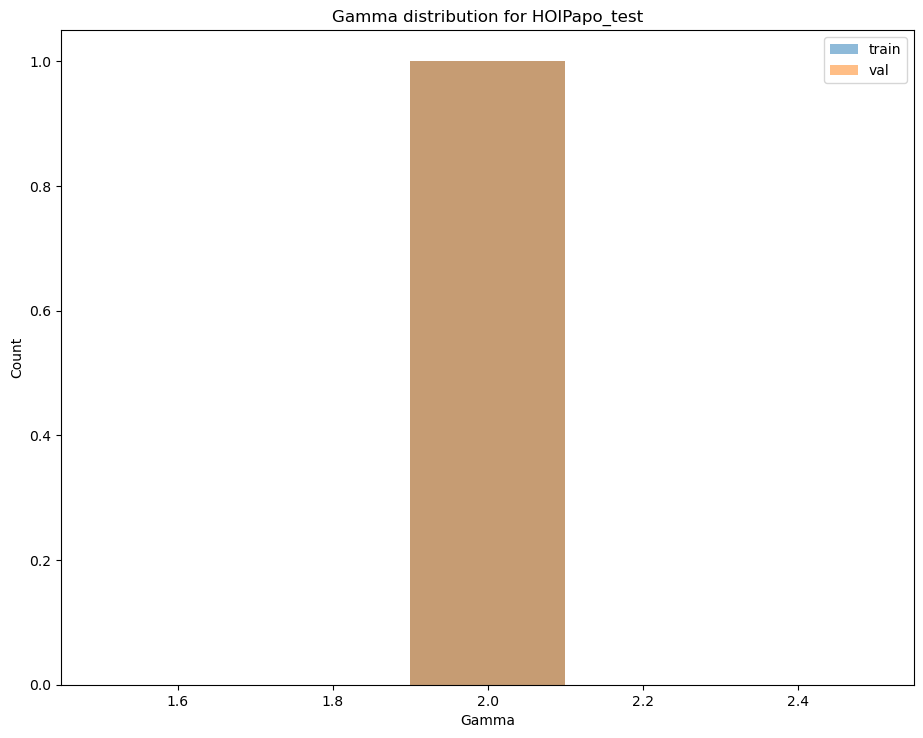

['train_HOIPapo_test_1']
['val_HOIPapo_test_1']
plot_dfracs_compare
     0.0       0.5       5.0  peptide             calc_name  ResStr  ResEnd  \
0    0.0  0.418790  0.444380        0          Experimental     NaN     NaN   
1    0.0  0.370960  0.452040        1          Experimental     NaN     NaN   
2    0.0  0.400400  0.485440        2          Experimental     NaN     NaN   
3    0.0  0.458750  0.515030        3          Experimental     NaN     NaN   
4    0.0  0.417260  0.495190        4          Experimental     NaN     NaN   
5    0.0  0.441760  0.509270        5          Experimental     NaN     NaN   
6    0.0  0.489870  0.540900        6          Experimental     NaN     NaN   
7    0.0  0.413160  0.482540        7          Experimental     NaN     NaN   
8    0.0  0.466170  0.510660        8          Experimental     NaN     NaN   
9    0.0  0.468250  0.520280        9          Experimental     NaN     NaN   
10   0.0  0.482730  0.531020       10          Experimental    

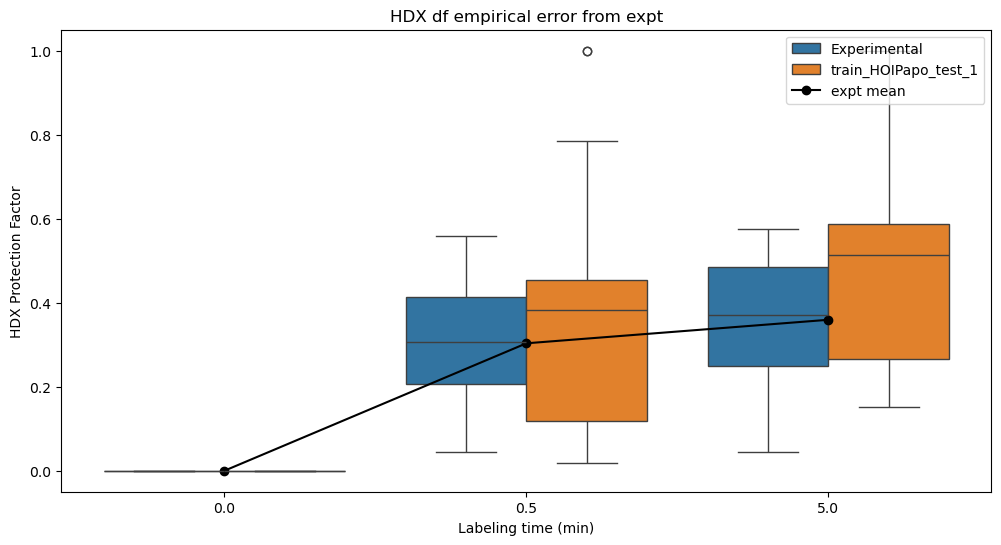

plot_dfracs_compare
     0.0       0.5       5.0  peptide             calc_name  ResStr  ResEnd  \
0    0.0  0.418790  0.444380        0          Experimental     NaN     NaN   
1    0.0  0.370960  0.452040        1          Experimental     NaN     NaN   
2    0.0  0.400400  0.485440        2          Experimental     NaN     NaN   
3    0.0  0.458750  0.515030        3          Experimental     NaN     NaN   
4    0.0  0.417260  0.495190        4          Experimental     NaN     NaN   
5    0.0  0.441760  0.509270        5          Experimental     NaN     NaN   
6    0.0  0.489870  0.540900        6          Experimental     NaN     NaN   
7    0.0  0.413160  0.482540        7          Experimental     NaN     NaN   
8    0.0  0.466170  0.510660        8          Experimental     NaN     NaN   
9    0.0  0.468250  0.520280        9          Experimental     NaN     NaN   
10   0.0  0.482730  0.531020       10          Experimental     NaN     NaN   
11   0.0  0.502580  0.539880    

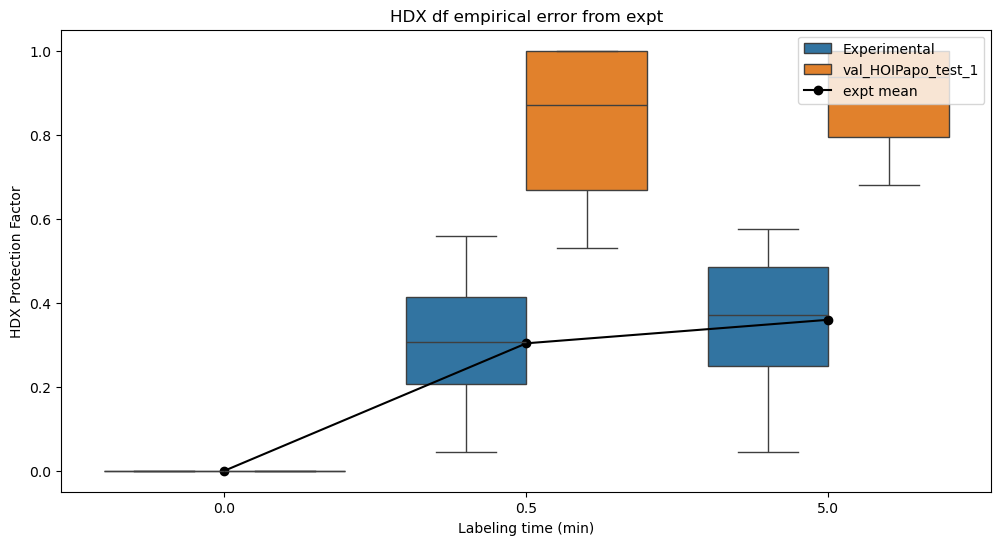

Restoring trainval peptide numbers
train_rep_names ['train_HOIPapo_test_1']
val_rep_names ['val_HOIPapo_test_1']
test_rep_names ['test_HOIPapo_test_1']
train_rep_peptides [17, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68]
val_rep_peptides [0, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]
manua

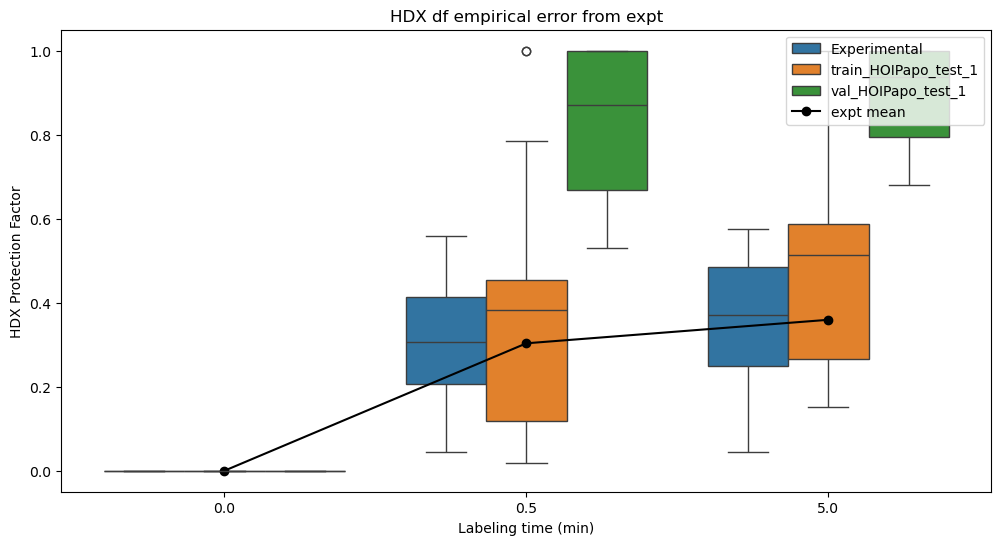

plotting paired errors
     0.0       0.5       5.0  peptide             calc_name  ResStr  ResEnd  \
0    0.0  0.418790  0.444380        0          Experimental     NaN     NaN   
1    0.0  0.370960  0.452040        1          Experimental     NaN     NaN   
2    0.0  0.400400  0.485440        2          Experimental     NaN     NaN   
3    0.0  0.458750  0.515030        3          Experimental     NaN     NaN   
4    0.0  0.417260  0.495190        4          Experimental     NaN     NaN   
5    0.0  0.441760  0.509270        5          Experimental     NaN     NaN   
6    0.0  0.489870  0.540900        6          Experimental     NaN     NaN   
7    0.0  0.413160  0.482540        7          Experimental     NaN     NaN   
8    0.0  0.466170  0.510660        8          Experimental     NaN     NaN   
9    0.0  0.468250  0.520280        9          Experimental     NaN     NaN   
10   0.0  0.482730  0.531020       10          Experimental     NaN     NaN   
11   0.0  0.502580  0.539880 

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


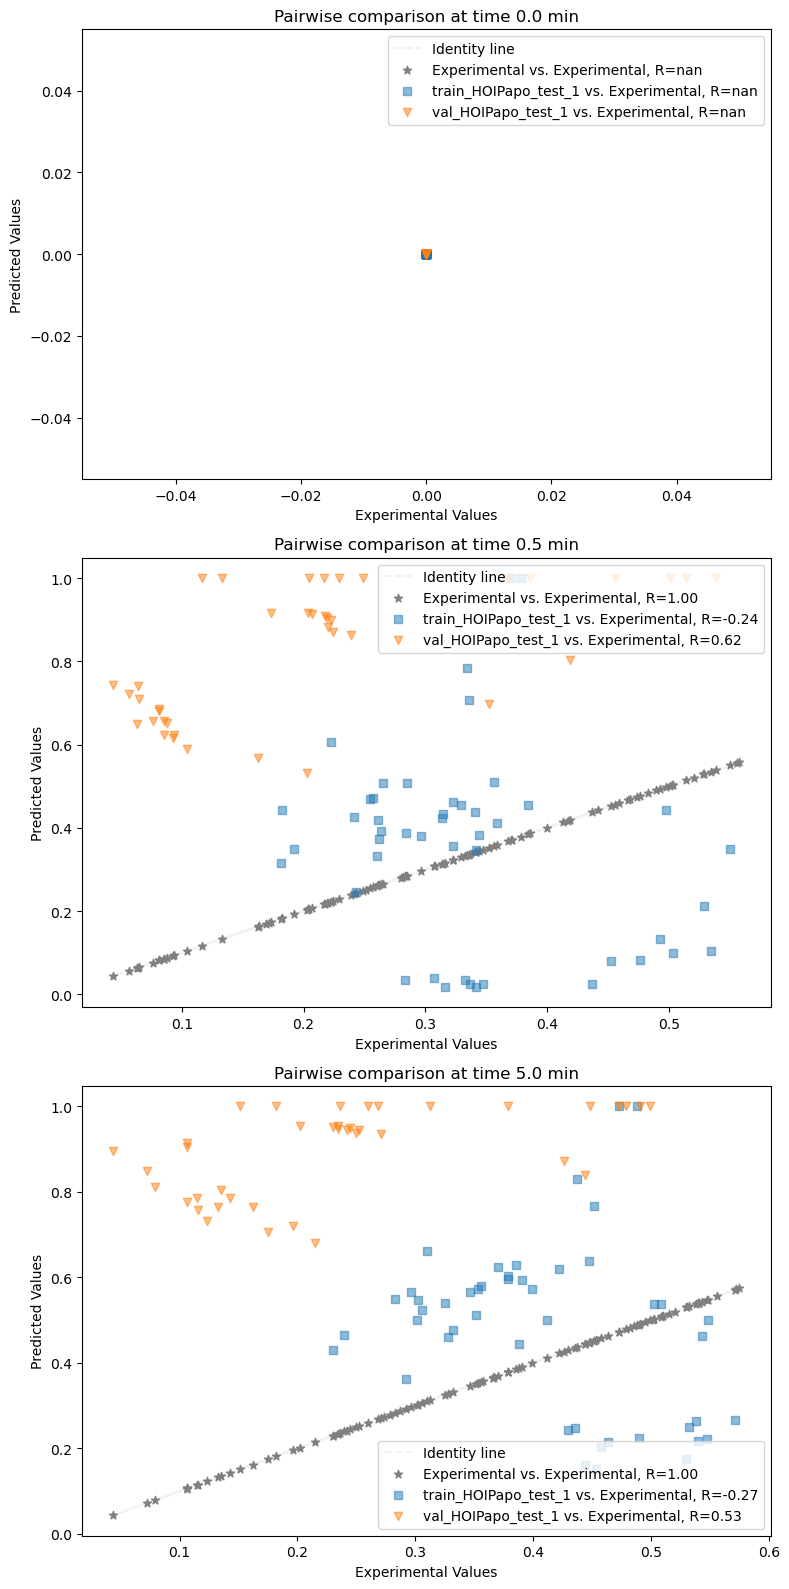

plotting paired trainval agreement
     0.0       0.5       5.0  peptide             calc_name  ResStr  ResEnd  \
0    0.0  0.418790  0.444380        0          Experimental     NaN     NaN   
1    0.0  0.370960  0.452040        1          Experimental     NaN     NaN   
2    0.0  0.400400  0.485440        2          Experimental     NaN     NaN   
3    0.0  0.458750  0.515030        3          Experimental     NaN     NaN   
4    0.0  0.417260  0.495190        4          Experimental     NaN     NaN   
5    0.0  0.441760  0.509270        5          Experimental     NaN     NaN   
6    0.0  0.489870  0.540900        6          Experimental     NaN     NaN   
7    0.0  0.413160  0.482540        7          Experimental     NaN     NaN   
8    0.0  0.466170  0.510660        8          Experimental     NaN     NaN   
9    0.0  0.468250  0.520280        9          Experimental     NaN     NaN   
10   0.0  0.482730  0.531020       10          Experimental     NaN     NaN   
11   0.0  0.50258

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["time", "R", "calc_name"])])
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dty

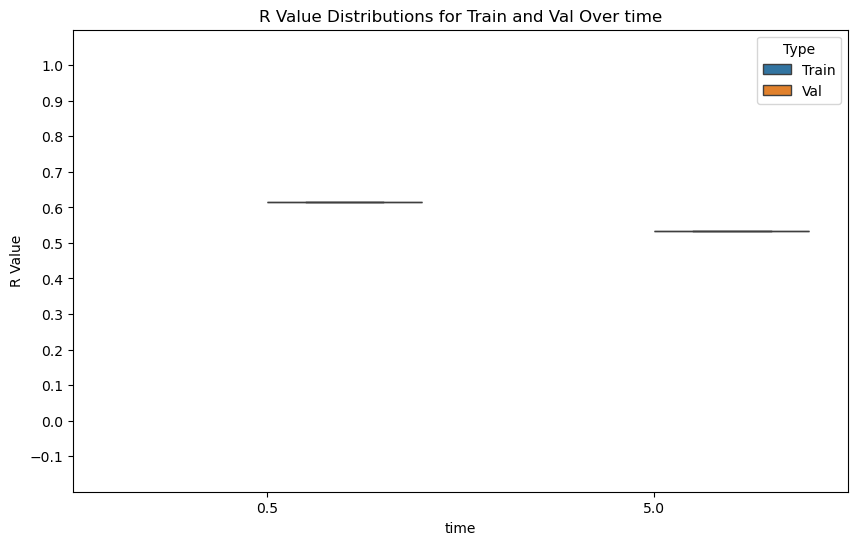

nan_df
     0.0       0.5       5.0  peptide             calc_name  ResStr  ResEnd  \
0    0.0  0.211680  0.500100       17  train_HOIPapo_test_1     NaN     NaN   
1    0.0  0.355130  0.501240       21  train_HOIPapo_test_1     NaN     NaN   
2    0.0  0.423040  0.572360       22  train_HOIPapo_test_1     NaN     NaN   
3    0.0  0.381690  0.619280       23  train_HOIPapo_test_1     NaN     NaN   
4    0.0  0.509100  0.580120       24  train_HOIPapo_test_1     NaN     NaN   
5    0.0  0.438050  0.513170       25  train_HOIPapo_test_1     NaN     NaN   
6    0.0  0.345790  0.444760       26  train_HOIPapo_test_1     NaN     NaN   
7    0.0  0.507540  0.566730       27  train_HOIPapo_test_1     NaN     NaN   
8    0.0  0.386380  0.476380       28  train_HOIPapo_test_1     NaN     NaN   
9    0.0  0.454520  0.593400       29  train_HOIPapo_test_1     NaN     NaN   
10   0.0  0.372290  0.565210       30  train_HOIPapo_test_1     NaN     NaN   
11   0.0  0.433310  0.604070       31  train_

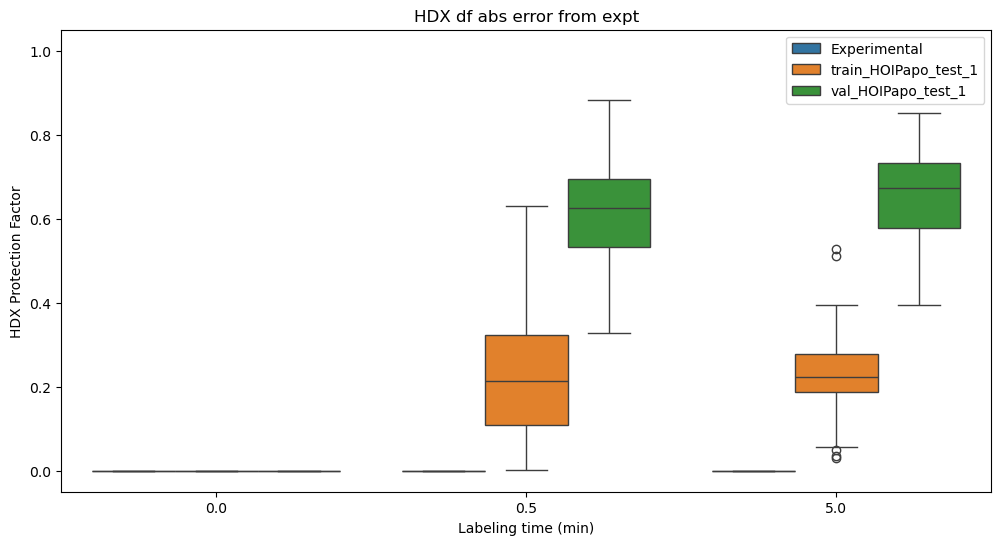

plot_dfracs_compare_MSE
     0.0       0.5       5.0  peptide             calc_name  ResStr  ResEnd  \
0    0.0  0.211680  0.500100       17  train_HOIPapo_test_1     NaN     NaN   
1    0.0  0.355130  0.501240       21  train_HOIPapo_test_1     NaN     NaN   
2    0.0  0.423040  0.572360       22  train_HOIPapo_test_1     NaN     NaN   
3    0.0  0.381690  0.619280       23  train_HOIPapo_test_1     NaN     NaN   
4    0.0  0.509100  0.580120       24  train_HOIPapo_test_1     NaN     NaN   
5    0.0  0.438050  0.513170       25  train_HOIPapo_test_1     NaN     NaN   
6    0.0  0.345790  0.444760       26  train_HOIPapo_test_1     NaN     NaN   
7    0.0  0.507540  0.566730       27  train_HOIPapo_test_1     NaN     NaN   
8    0.0  0.386380  0.476380       28  train_HOIPapo_test_1     NaN     NaN   
9    0.0  0.454520  0.593400       29  train_HOIPapo_test_1     NaN     NaN   
10   0.0  0.372290  0.565210       30  train_HOIPapo_test_1     NaN     NaN   
11   0.0  0.433310  0.604070

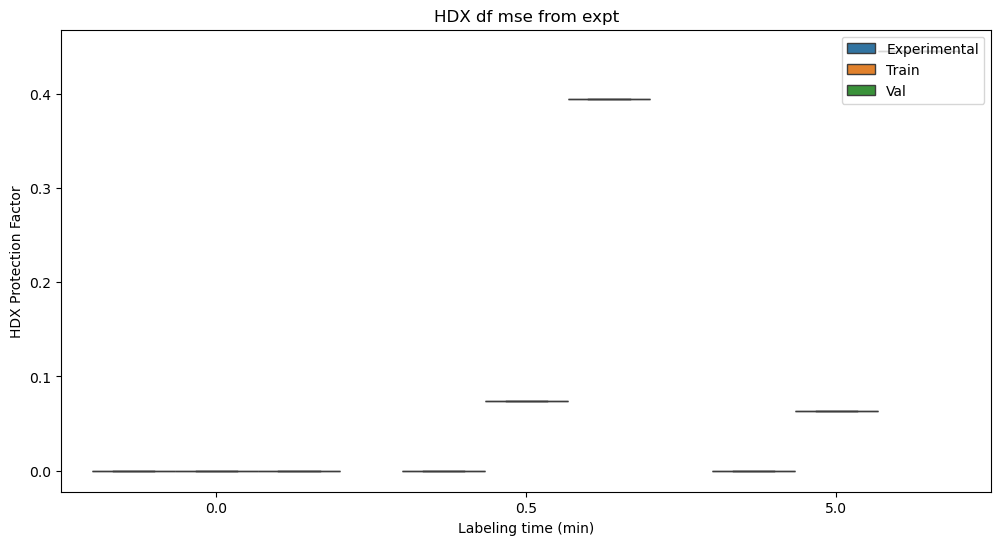

Saving experiment to:  logs/mixAandB_Sp9_1707940969.pkl


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)
/var/folders/4c/64jkr7n54w1558kqk0ks5rgr0000gn/T/ipykernel_82508/2552974476.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  analysis_df = pd.concat([analysis_df, df])


In [25]:

splits = ['S', 'SR', 'Sp']
split_names = ['AvsB', 'LvsX', 'mixAandB']
system = 'BPTITtut_test'

raw_run_outputs = {}
analysis_dumps = {}
analysis_df = pd.DataFrame()
names = []
save_paths = []


for split, split_name in zip(splits, split_names):
    run_outputs, analysis_dump, df, name, save_path = run_split_test(split, split_name, system)
    raw_run_outputs[name] = run_outputs
    analysis_dumps.update(analysis_dump)
    analysis_df = pd.concat([analysis_df, df])
    names.append(name)
    save_paths.append(save_path)



/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


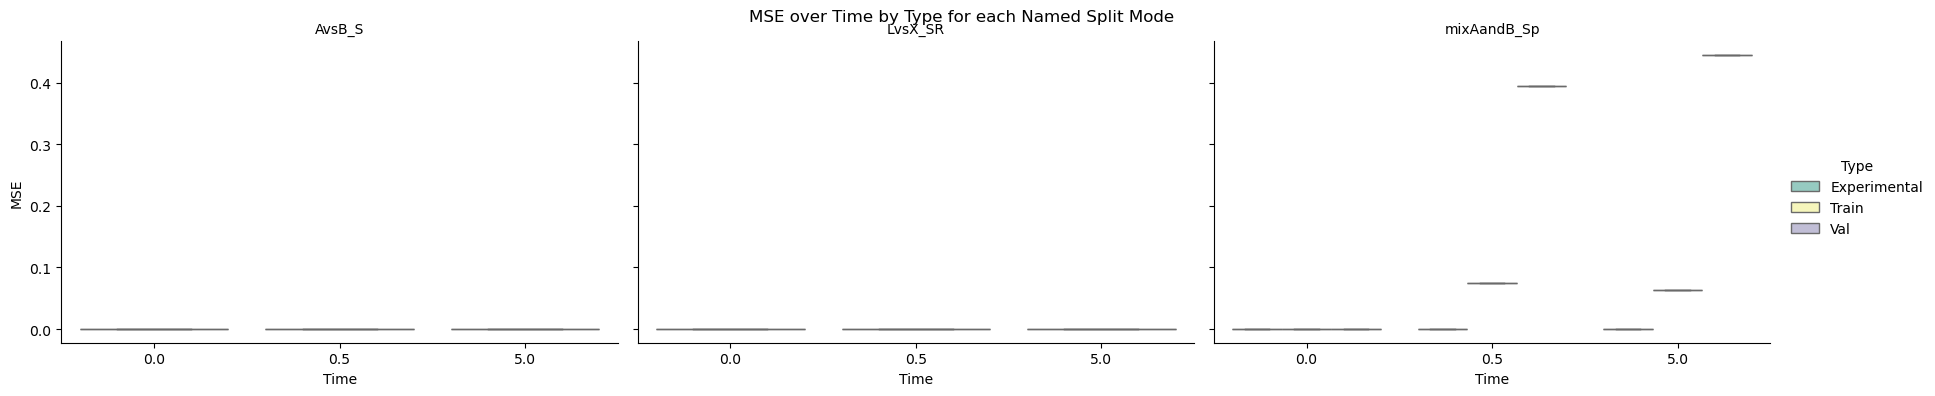

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('MSE over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "mse", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "MSE")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

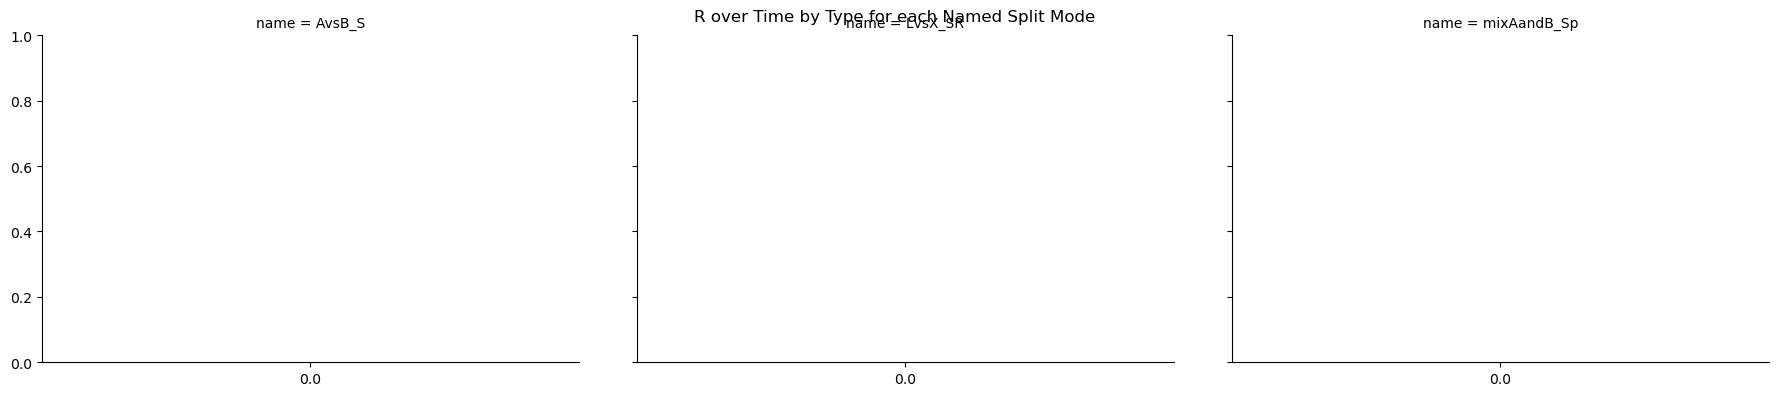

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('R over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "R", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "R")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


                                               LogPf  \
0  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
1  [1.75, 4.55, 5.6, 4.8999999999999995, 9.7, 9.7...   
2  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
3  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
0  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
1  [1.75, 4.55, 5.6, 4.8999999999999995, 9.7, 9.7...   
2  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
3  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
0  [9.734729536884675, 9.728149294701376, 9.74789...   
1  [1.75, 4.55, 5.6, 4.8999999999999995, 9.7, 9.7...   
2  [0.032901210916489634, 0.08554314838287304, 0....   
3  [0.032901210916489634, 0.08554314838287304, 0....   

                  calc_name  \
0      train_HOIPapo_test_1   
1  no_weight_HOIPapo_test_1   
2        val_HOIPapo_test_1   
3       test_HOIPapo_test_1   
0      train_HOIPapo_test_1   
1  no_weight_HOIPapo_test_1   
2        val_HOIPapo_test_1   
3       test_HOIPapo_te

ValueError: cannot reindex on an axis with duplicate labels

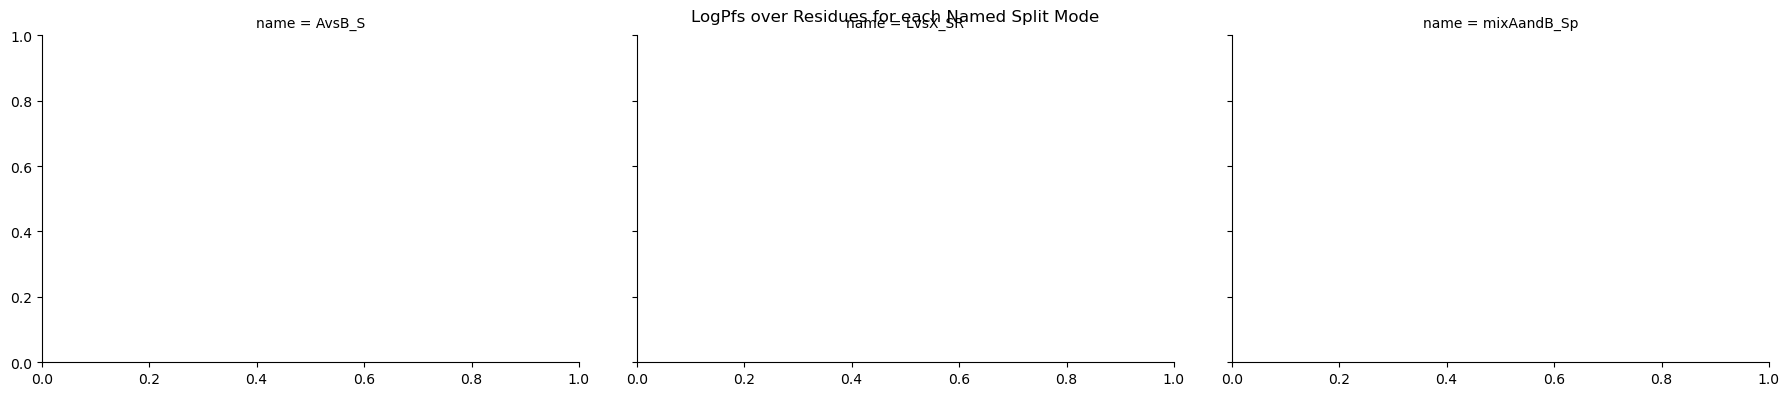

In [29]:
# plot LogPfs by Residues colour by calc_name facet wrap by name
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
LogPfs = pd.concat([analysis_dumps[i]["LogPfs"] for i in names])

print(LogPfs)

LogPfs_df = LogPfs.explode(['LogPf','Residues'])


# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(LogPfs_df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('LogPfs over Residues for each Named Split Mode')

# Create lineplots
g = g.map(sns.lineplot, "Residues", "LogPf", "calc_name", palette="Set2")

# Adding some additional options for better visualization
g.add_legend(title='calc_name')
g.set_axis_labels("Residues", "LogPf")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
# from MDAnalysis.analysis.dssp import DSSP



In [ ]:
# VDX.paths.head()

In [ ]:
# print(top_path)

In [ ]:
# pdb_test = mda.Universe(top_path)

# # write out as a pdb and add header
# pdb_test.atoms.write('test.pdb')
# with open('test.pdb', 'r') as original: data = original.read()
# with open('test.pdb', 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)



In [ ]:


# def PDB_to_DSSP(top_path: str, dssp_path: str=None, sim_name: str=None):
#     """
#     Run DSSP on a PDB file to generate a DSSP file. Reads the output and returns a list of secondary structure elements.
#     Secondary structure elements are reduced to a single character: H (alpha helix), S (beta sheet), or L (loop).
#     Args:
#     - top_path (str): The path to the topology file to create the PDB file from.
#     - dssp_path (str): The path to save the DSSP file.
#     - sim_name (str): Simulation name to be included in the HEADER of the PDB file.
#     Returns:
#     - List of tuples, each containing the residue number and its secondary structure element.
#     """
#     temp_pdb = "do_mkdssp.pdb"

#     if sim_name is None:
#         sim_name = "DSSP HEADER"
#     if dssp_path is None:
#         dssp_path = "dssp_file.dssp"
#     print(top_path)
#     pdb_test = mda.Universe(top_path)

#     # write out as a pdb and add header
#     pdb_test.atoms.write(temp_pdb)


#     with open(temp_pdb, 'r') as original: data = original.read()
#     with open(temp_pdb, 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)

#     # Run mkdssp to generate DSSP file
#     try:
#         subprocess.run(['mkdssp', temp_pdb,  dssp_path], check=True)
#     except subprocess.CalledProcessError as e:
#         print(f"Error running DSSP: {e}")
#         return []

#     # Parse the DSSP file
#     secondary_structures = []
#     with open(dssp_path, 'r') as dssp_file:
#         # Skip header lines
#         for line in dssp_file:
#             if line.startswith('  #  RESIDUE AA'):
#                 break
#         # Read the secondary structure assignments
#         for line in dssp_file:
#             if len(line) > 13:  # Ensure line has enough data
#                 residue_num = line[5:10].strip()
#                 ss = line[16]
#                 # Simplify the secondary structure to H, S, or L
#                 if ss in 'GHI':
#                     ss = 'H'  # Helix
#                 elif ss in 'EB':
#                     ss = 'S'  # Sheet
#                 else:
#                     ss = 'L'  # Loop or other
#                 secondary_structures.append((residue_num, ss))

#     # Cleanup temp PDB file
#     os.remove(temp_pdb)
#     os.remove(dssp_path)
#     print(len(secondary_structures))
#     print(len(pdb_test.residues))
#     return secondary_structures

